<center><h2>Heart Attack Analysis & Prediction - Notebook

<center><h3>Priboi Luca Mihai

**Source:** https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

**Description:** This dataset contains information about people and their heart health. The goal is to predict if a person has a high risk of heart attack based on the information provided. The dataset is already cleaned and ready to be used for analysis and prediction.

**Content:** The dataset contains 14 variables and 303 instances. The variables are:

1. **age** - Age
    * **Description:** The age of the pacient in years.
    * **Type:** Numerical
    
2. **sex** - Gender
    * **Description:** Represents the biological gender of the pacient.
    * **Values:**
        * 0: Female
        * 1: Male
    * **Type:** Nominal

3. **cp** - Chest Pain
    * **Description:** Describes the type of chest pain experienced by the individual.
    * **Values:**
        * 0: Typical Angina
        * 1: Atypical Angina
        * 2: Non-Anginal Pain
        * 3: Asymptomatic
    * **Type:** Nominal

4. **trtbps** - Resting Blood Pressure
    * **Description:** Represents the resting blood pressure of the pacient.
    * **Values:** Measured in mm Hg (millimeters of mercury).
    * **Type:** Numerical

5. **chol** - Serum Cholesterol
    * **Description:** Represents the serum cholesterol levels of the pacient. Serum cholesterol is the amount of cholesterol circulating in the bloodstream.
    * **Values:** Measured in mg/dl (milligrams per deciliter) of blood.
    * **Type:** Numerical

6. **fbs** - Fasting Blood Sugar
    * **Description:** Represents the fasting blood sugar levels of the pacient. Fasting blood sugar is a measure of the glucose levels in the blood after fasting (not eating or drinking) for 8 hours.
    * **Values:**
        * 0: Fasting Blood Sugar <= 120 mg/dl
        * 1: Fasting Blood Sugar > 120 mg/dl
    * **Type:** Ordinal

7. **restecg** - Resting Electrocardiographic Results
    * **Description:** Represents the resting electrocardiographic results of the pacient, providing information about the electrical activity of the heart while at rest.
    * **Values:**
        * 0: Normal
        * 1: ST-T Wave Abnormality (T Wave inversions and/or ST elevation or depression of > 0.05 mV)
        * 2: Probable or definite left ventricular hypertrophy by Estes' criteria
    * **Type:** Nominal

8. **thalachh** - Maximum Heart Rate Achieved
    * **Description:** Represents the maximum heart rate achieved by the pacient. The maximum heart rate is the highest heart rate achieved during a maximal exercise test.
    * **Values:** Measured in bpm (beats per minute).
    * **Type:** Numerical

9. **exng** - Exercise Induced Angina
    * **Description:** Represents if the pacient experienced exercise induced angina. Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.
    * **Values:**
        * 0: No
        * 1: Yes
    * **Type:** Nominal

10. **oldpeak** - ST Depression
    * **Description:** Represents the ST depression induced by exercise relative to rest. ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.
    * **Values:** Measured in mm (millimeters).
    * **Type:** Numerical

11. **slp** - Slope of the Peak Exercise ST Segment
    * **Description:** Represents the slope of the peak exercise ST segment.
    * **Values:**
        * 0: Upsloping
        * 1: Flat
        * 2: Downsloping
    * **Type:** Ordinal

12. **caa** - Number of Major Vessels
    * **Description:** Represents the number of major vessels colored by fluoroscopy. Fluoroscopy is an imaging technique that uses X-rays to obtain real-time moving images of the interior of an object.
    * **Values:** Ranges from 0 to 3.
    * **Type:** Ordinal

13. **thall** - Thalium Stress Test Result
    * **Description:** Represents the result of the thalium stress test. The thalium stress test is a nuclear imaging method that shows how well blood flows into the heart muscle, both at rest and during activity.
    * **Values:**
        * 1: Normal
        * 2: Fixed Defect
        * 3: Reversible Defect
    * **Type:** Nominal

14. **output** - Heart Attack Risk
    * **Description:** Represents if the pacient is at risk of having a heart attack.
    * **Values:**
        * 0: Low Risk
        * 1: High Risk
    * **Type:** Nominal

## Importing the Libraries and the Dataset

In [650]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import skew, norm, probplot, boxcox, f_oneway

import warnings
warnings.filterwarnings("ignore")

In [651]:
df = pd.read_csv("heart.csv")

In [652]:
df.shape

(303, 14)

In [653]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [654]:
category_names = ['Age', 'Gender', 'Chest_Pain', 'Resting_BP', 'Cholesterol', 'Fasting_Sugar', 'Resting_ECG', 'Max_Heart_Rate', 
                  'Exercise_Angina', 'ST_Depression', 'ST_Slope', 'Major_Vessels', 'Thallium_Test', 'Outcome']

# Rename columns
for i in range(len(category_names)):
    df.rename(columns={df.columns[i]: category_names[i]}, inplace=True)

### Changing the numerical values of the categorical variables to their corresponding labels

In [656]:
df['Gender'] = df['Gender'].replace({0: 'F', 1:'M'})
df['Chest_Pain'] = df['Chest_Pain'].replace({0: 'Typical Angina', 1:'Atypical Angina', 2:'Non-Anginal Pain', 3:'Asymptomatic'})
df['Fasting_Sugar'] = df['Fasting_Sugar'].replace({0: '<= 120mg/ml', 1:'> 120mg/ml'})
df['Resting_ECG'] = df['Resting_ECG'].replace({0: 'Normal', 1:'ST-T Wave Abnormality', 2:'Left Ventricular Hypertrophy'})
df['Exercise_Angina'] = df['Exercise_Angina'].replace({0: 'No', 1:'Yes'})
df['ST_Slope'] = df['ST_Slope'].replace({0: 'Upsloping', 1:'Flat', 2:'Downsloping'})
df['Thallium_Test'] = df['Thallium_Test'].replace({0: 'Null', 1: 'Fixed defect', 2:'Normal', 3:'Reversible Defect'})
df['Outcome'] = df['Outcome'].replace({0: 'Low Risk', 1:'High Risk'})

## Descriptive statistics

In [657]:
df.head(10).T

0                      1                2  \
Age                        63                     37               41   
Gender                      M                      M                F   
Chest_Pain       Asymptomatic       Non-Anginal Pain  Atypical Angina   
Resting_BP                145                    130              130   
Cholesterol               233                    250              204   
Fasting_Sugar      > 120mg/ml            <= 120mg/ml      <= 120mg/ml   
Resting_ECG            Normal  ST-T Wave Abnormality           Normal   
Max_Heart_Rate            150                    187              172   
Exercise_Angina            No                     No               No   
ST_Depression            2.30                   3.50             1.40   
ST_Slope            Upsloping              Upsloping      Downsloping   
Major_Vessels               0                      0                0   
Thallium_Test    Fixed defect                 Normal           Normal   
Outcome             High Risk              High Risk        High Risk   

                                     3                      4  \
Age                                 56                     57   
Gender                               M                      F   
Chest_Pain             Atypical Angina         Typical Angina   
Resting_BP                         120                    120   
Cholesterol                        236                    354   
Fasting_Sugar              <= 120mg/ml            <= 120mg/ml   
Resting_ECG      ST-T Wave Abnormality  ST-T Wave Abnormality   
Max_Heart_Rate                     178                    163   
Exercise_Angina                     No                    Yes   
ST_Depression                     0.80                   0.60   
ST_Slope                   Downsloping            Downsloping   
Major_Vessels                        0                      0   
Thallium_Test                   Normal                 Normal   
Outcome                      High Risk              High Risk   

                                     5                6  \
Age                                 57               56   
Gender                               M                F   
Chest_Pain              Typical Angina  Atypical Angina   
Resting_BP                         140              140   
Cholesterol                        192              294   
Fasting_Sugar              <= 120mg/ml      <= 120mg/ml   
Resting_ECG      ST-T Wave Abnormality           Normal   
Max_Heart_Rate                     148              153   
Exercise_Angina                     No               No   
ST_Depression                     0.40             1.30   
ST_Slope                          Flat             Flat   
Major_Vessels                        0                0   
Thallium_Test             Fixed defect           Normal   
Outcome                      High Risk        High Risk   

                                     7                      8  \
Age                                 44                     52   
Gender                               M                      M   
Chest_Pain             Atypical Angina       Non-Anginal Pain   
Resting_BP                         120                    172   
Cholesterol                        263                    199   
Fasting_Sugar              <= 120mg/ml             > 120mg/ml   
Resting_ECG      ST-T Wave Abnormality  ST-T Wave Abnormality   
Max_Heart_Rate                     173                    162   
Exercise_Angina                     No                     No   
ST_Depression                     0.00                   0.50   
ST_Slope                   Downsloping            Downsloping   
Major_Vessels                        0                      0   
Thallium_Test        Reversible Defect      Reversible Defect   
Outcome                      High Risk              High Risk   

                                     9  
Age                                 57  
Gender      

In [658]:
dict={}
for i in list(df.columns):
    dict[i]=df[i].value_counts().shape[0]
pd.DataFrame(dict,index=['Unique Count']).transpose()

Unique Count
Age                        41
Gender                      2
Chest_Pain                  4
Resting_BP                 49
Cholesterol               152
Fasting_Sugar               2
Resting_ECG                 3
Max_Heart_Rate             91
Exercise_Angina             2
ST_Depression              40
ST_Slope                    3
Major_Vessels               5
Thallium_Test               4
Outcome                     2

In [659]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe().T

count   mean   std    min    25%    50%    75%    max
Age            303.00  54.37  9.08  29.00  47.50  55.00  61.00  77.00
Resting_BP     303.00 131.62 17.54  94.00 120.00 130.00 140.00 200.00
Cholesterol    303.00 246.26 51.83 126.00 211.00 240.00 274.50 564.00
Max_Heart_Rate 303.00 149.65 22.91  71.00 133.50 153.00 166.00 202.00
ST_Depression  303.00   1.04  1.16   0.00   0.00   0.80   1.60   6.20
Major_Vessels  303.00   0.73  1.02   0.00   0.00   0.00   1.00   4.00

In [660]:
# Range for numerical variables
for i in df.columns:
    if df[i].dtype != 'object':
        print(i, "Range:", df[i].max()-df[i].min())

Age Range: 48
Resting_BP Range: 106
Cholesterol Range: 438
Max_Heart_Rate Range: 131
ST_Depression Range: 6.2
Major_Vessels Range: 4


In [661]:
df.var()

Age                82.48
Resting_BP        307.59
Cholesterol      2686.43
Max_Heart_Rate    524.65
ST_Depression       1.35
Major_Vessels       1.05
dtype: float64

In [662]:
df['Outcome'].value_counts()

High Risk    165
Low Risk     138
Name: Outcome, dtype: int64

In [663]:
# Group by DV and IV
df.groupby(['Outcome']).median().sort_values(by='Outcome', ascending=False)

Age  Resting_BP  Cholesterol  Max_Heart_Rate  ST_Depression  \
Outcome                                                                   
Low Risk  58.00      130.00       249.00          142.00           1.40   
High Risk 52.00      130.00       234.00          161.00           0.20   

           Major_Vessels  
Outcome                   
Low Risk            1.00  
High Risk           0.00

## Exploratory Data Analysis

### Pearson's Correlation

In [664]:
df.corr(method='pearson')

Age  Resting_BP  Cholesterol  Max_Heart_Rate  ST_Depression  \
Age             1.00        0.28         0.21           -0.40           0.21   
Resting_BP      0.28        1.00         0.12           -0.05           0.19   
Cholesterol     0.21        0.12         1.00           -0.01           0.05   
Max_Heart_Rate -0.40       -0.05        -0.01            1.00          -0.34   
ST_Depression   0.21        0.19         0.05           -0.34           1.00   
Major_Vessels   0.28        0.10         0.07           -0.21           0.22   

                Major_Vessels  
Age                      0.28  
Resting_BP               0.10  
Cholesterol              0.07  
Max_Heart_Rate          -0.21  
ST_Depression            0.22  
Major_Vessels            1.00

In [665]:
df.corr(method='pearson').abs().where(np.triu(np.ones(df.corr().abs().shape), k=1).astype(np.bool)).stack().sort_values(ascending=False)

Age             Max_Heart_Rate   0.40
Max_Heart_Rate  ST_Depression    0.34
Age             Resting_BP       0.28
                Major_Vessels    0.28
ST_Depression   Major_Vessels    0.22
Age             Cholesterol      0.21
Max_Heart_Rate  Major_Vessels    0.21
Age             ST_Depression    0.21
Resting_BP      ST_Depression    0.19
                Cholesterol      0.12
                Major_Vessels    0.10
Cholesterol     Major_Vessels    0.07
                ST_Depression    0.05
Resting_BP      Max_Heart_Rate   0.05
Cholesterol     Max_Heart_Rate   0.01
dtype: float64

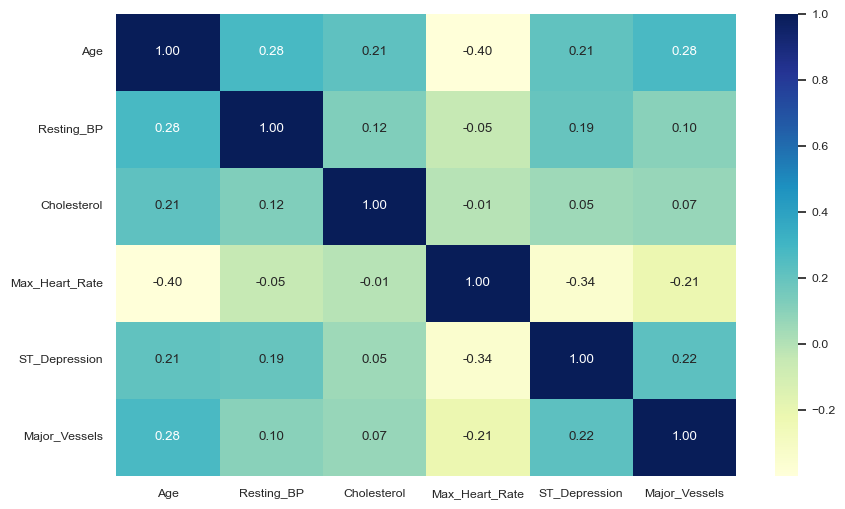

In [666]:
plt.figure(figsize=(10,6))
sns.set(font_scale=0.8)
plt.rcParams["axes.labelsize"] = 0.5
sns.heatmap(df.corr(method='pearson'), annot=True, cmap="YlGnBu", fmt='.2f');

**Note:** The only noteworthy correlation is between the age and the maximum heart rate achieved, which is negative. This means that the older the pacient, the lower the maximum heart rate achieved. Even so, the correlation has only a fair relationship strenght.

### Spearman Rank or Spearman's Rho

In [667]:
df.corr(method='spearman')

Age  Resting_BP  Cholesterol  Max_Heart_Rate  ST_Depression  \
Age             1.00        0.29         0.20           -0.40           0.27   
Resting_BP      0.29        1.00         0.13           -0.04           0.15   
Cholesterol     0.20        0.13         1.00           -0.05           0.05   
Max_Heart_Rate -0.40       -0.04        -0.05            1.00          -0.43   
ST_Depression   0.27        0.15         0.05           -0.43           1.00   
Major_Vessels   0.34        0.09         0.11           -0.26           0.22   

                Major_Vessels  
Age                      0.34  
Resting_BP               0.09  
Cholesterol              0.11  
Max_Heart_Rate          -0.26  
ST_Depression            0.22  
Major_Vessels            1.00

In [668]:
df.corr(method='spearman').abs().where(np.triu(np.ones(df.corr().abs().shape), k=1).astype(np.bool)).stack().sort_values(ascending=False)

Max_Heart_Rate  ST_Depression    0.43
Age             Max_Heart_Rate   0.40
                Major_Vessels    0.34
                Resting_BP       0.29
                ST_Depression    0.27
Max_Heart_Rate  Major_Vessels    0.26
ST_Depression   Major_Vessels    0.22
Age             Cholesterol      0.20
Resting_BP      ST_Depression    0.15
                Cholesterol      0.13
Cholesterol     Major_Vessels    0.11
Resting_BP      Major_Vessels    0.09
Cholesterol     Max_Heart_Rate   0.05
                ST_Depression    0.05
Resting_BP      Max_Heart_Rate   0.04
dtype: float64

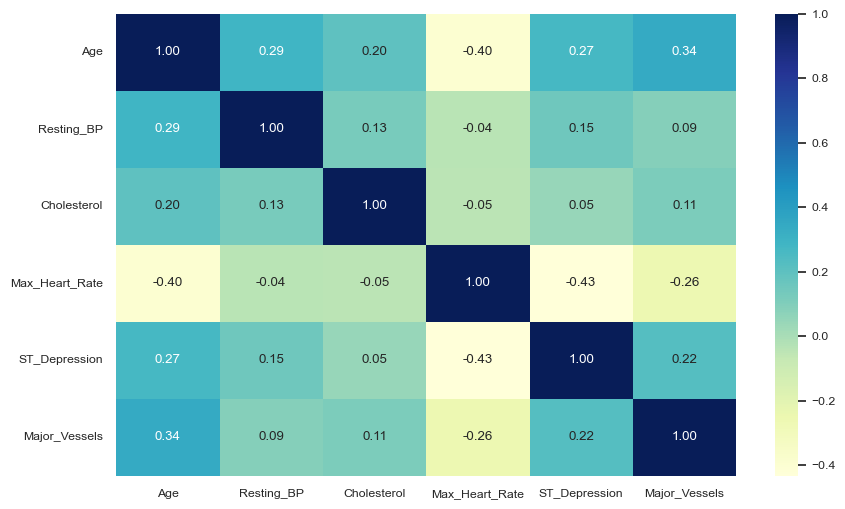

In [669]:
plt.figure(figsize=(10,6))
sns.set(font_scale=0.8)
plt.rcParams["axes.labelsize"] = 0.5
sns.heatmap(df.corr(method='spearman'), annot=True, cmap="YlGnBu", fmt='.2f');

**Note:** Two notable correlations are:
 - between the *Maximum Heart Rate* and the *ST Depression*: the higher the maximum heart rate, the lower the ST depression;
 - between the *Age* and the *Maximum Heart Rate*: the the lower the age, the higher the maximum heart rate.

Even so, the correlations have only a fair relationship strenght.

### Phi K (𝜙k) Correlation

In [670]:
# Phi K correlation will for all variables

! pip install phik
import phik
from phik import resources, report

Defaulting to user installation because normal site-packages is not writeable


In [671]:
df.phik_matrix()

interval columns not set, guessing: ['Age', 'Resting_BP', 'Cholesterol', 'Max_Heart_Rate', 'ST_Depression', 'Major_Vessels']


Age  Gender  Chest_Pain  Resting_BP  Cholesterol  \
Age             1.00    0.00        0.18        0.26         0.00   
Gender          0.00    1.00        0.17        0.00         0.28   
Chest_Pain      0.18    0.17        1.00        0.20         0.00   
Resting_BP      0.26    0.00        0.20        1.00         0.00   
Cholesterol     0.00    0.28        0.00        0.00         1.00   
Fasting_Sugar   0.00    0.00        0.08        0.16         0.00   
Resting_ECG     0.32    0.05        0.08        0.28         0.22   
Max_Heart_Rate  0.53    0.22        0.35        0.22         0.00   
Exercise_Angina 0.09    0.19        0.66        0.13         0.00   
ST_Depression   0.00    0.00        0.27        0.23         0.09   
ST_Slope        0.04    0.00        0.20        0.03         0.00   
Major_Vessels   0.49    0.09        0.19        0.10         0.00   
Thallium_Test   0.16    0.55        0.46        0.00         0.00   
Outcome         0.34    0.41        0.72        0.00         0.08   

                 Fasting_Sugar  Resting_ECG  Max_Heart_Rate  Exercise_Angina  \
Age                       0.00         0.32            0.53             0.09   
Gender                    0.00         0.05            0.22             0.19   
Chest_Pain                0.08         0.08            0.35             0.66   
Resting_BP                0.16         0.28            0.22             0.13   
Cholesterol               0.00         0.22            0.00             0.00   
Fasting_Sugar             1.00         0.02            0.01             0.00   
Resting_ECG               0.02         1.00            0.14             0.03   
Max_Heart_Rate            0.01         0.14            1.00             0.50   
Exercise_Angina           0.00         0.03            0.50             1.00   
ST_Depression             0.00         0.65            0.30             0.28   
ST_Slope                  0.04         0.32            0.45             0.17   
Major_Vessels             0.09         0.08            0.33             0.14   
Thallium_Test             0.14         0.00            0.29             0.47   
Outcome                   0.00         0.10            0.53             0.62   

                 ST_Depression  ST_Slope  Major_Vessels  Thallium_Test  \
Age                       0.00      0.04           0.49           0.16   
Gender                    0.00      0.00           0.09           0.55   
Chest_Pain                0.27      0.20           0.19           0.46   
Resting_BP                0.23      0.03           0.10           0.00   
Cholesterol               0.09      0.00           0.00           0.00   
Fasting_Sugar             0.00      0.04           0.09           0.14   
Resting_ECG               0.65      0.32           0.08           0.00   
Max_Heart_Rate            0.30      0.45           0.33           0.29   
Exercise_Angina           0.28      0.17           0.14           0.47   
ST_Depression             1.00      0.74           0.32           0.34   
ST_Slope                  0.74      1.00           0.10           0.23   
Major_Vessels             0.32      0.10           1.00           0.14   
Thallium_Test             0.34      0.23           0.14           1.00   
Outcome                   0.44      0.24           0.40           0.73   

                 Outcome  
Age                 0.34  
Gender              0.41  
Chest_Pain          0.72  
Resting_BP          0.00  
Cholesterol         0.08  
Fasting_Sugar       0.00  
Resting_ECG         0.10  
Max_Heart_Rate      0.53  
Exercise_Angina     0.62  
ST_Depression       0.44  
ST_Slope            0.24  
Major_Vessels       0.40  
Thallium_Test       0.73  
Outcome             1.00

In [672]:
# The first 20 correlations in descending order, excluding the diagonal
df.phik_matrix().abs().where(np.triu(np.ones(df.phik_matrix().abs().shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(20)

interval columns not set, guessing: ['Age', 'Resting_BP', 'Cholesterol', 'Max_Heart_Rate', 'ST_Depression', 'Major_Vessels']
interval columns not set, guessing: ['Age', 'Resting_BP', 'Cholesterol', 'Max_Heart_Rate', 'ST_Depression', 'Major_Vessels']


ST_Depression    ST_Slope          0.74
Thallium_Test    Outcome           0.73
Chest_Pain       Outcome           0.72
                 Exercise_Angina   0.66
Resting_ECG      ST_Depression     0.65
Exercise_Angina  Outcome           0.62
Gender           Thallium_Test     0.55
Max_Heart_Rate   Outcome           0.53
Age              Max_Heart_Rate    0.53
Max_Heart_Rate   Exercise_Angina   0.50
Age              Major_Vessels     0.49
Exercise_Angina  Thallium_Test     0.47
Chest_Pain       Thallium_Test     0.46
Max_Heart_Rate   ST_Slope          0.45
ST_Depression    Outcome           0.44
Gender           Outcome           0.41
Major_Vessels    Outcome           0.40
Chest_Pain       Max_Heart_Rate    0.35
ST_Depression    Thallium_Test     0.34
Age              Outcome           0.34
dtype: float64

interval columns not set, guessing: ['Age', 'Resting_BP', 'Cholesterol', 'Max_Heart_Rate', 'ST_Depression', 'Major_Vessels']


<AxesSubplot: >

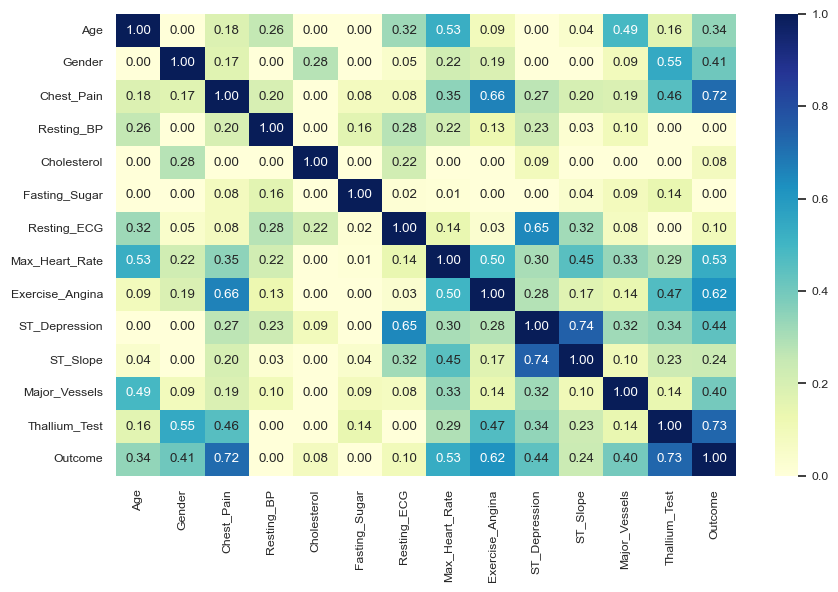

In [673]:
plt.figure(figsize=(10,6))
sns.set(font_scale=0.8)
plt.rcParams["axes.labelsize"] = 0.5
sns.heatmap(df.phik_matrix(), annot=True, cmap="YlGnBu", fmt='.2f')

**Note:** In the case of the 𝜙k Correlation, there are several moderate to good relationships:
 - *ST_Depression* & *ST_Slope*: the higher the ST depression, the higher the ST slope, and vice-versa;
 - *Thallium_Test* & *Outcome*: the higher the thallium test result, the higher the risk of heart attack;
 - *Chest_Pain* & *Outcome*: the higher the chest pain, the higher the risk of heart attack;
 - *Chest_Pain* & *Exercise_Angina*: the higher the chest pain, the higher the probability of exercise induced angina;
 - *Exercise_Angina* & *Outcome*: the higher the exercise induced angina, the higher the risk of heart attack;

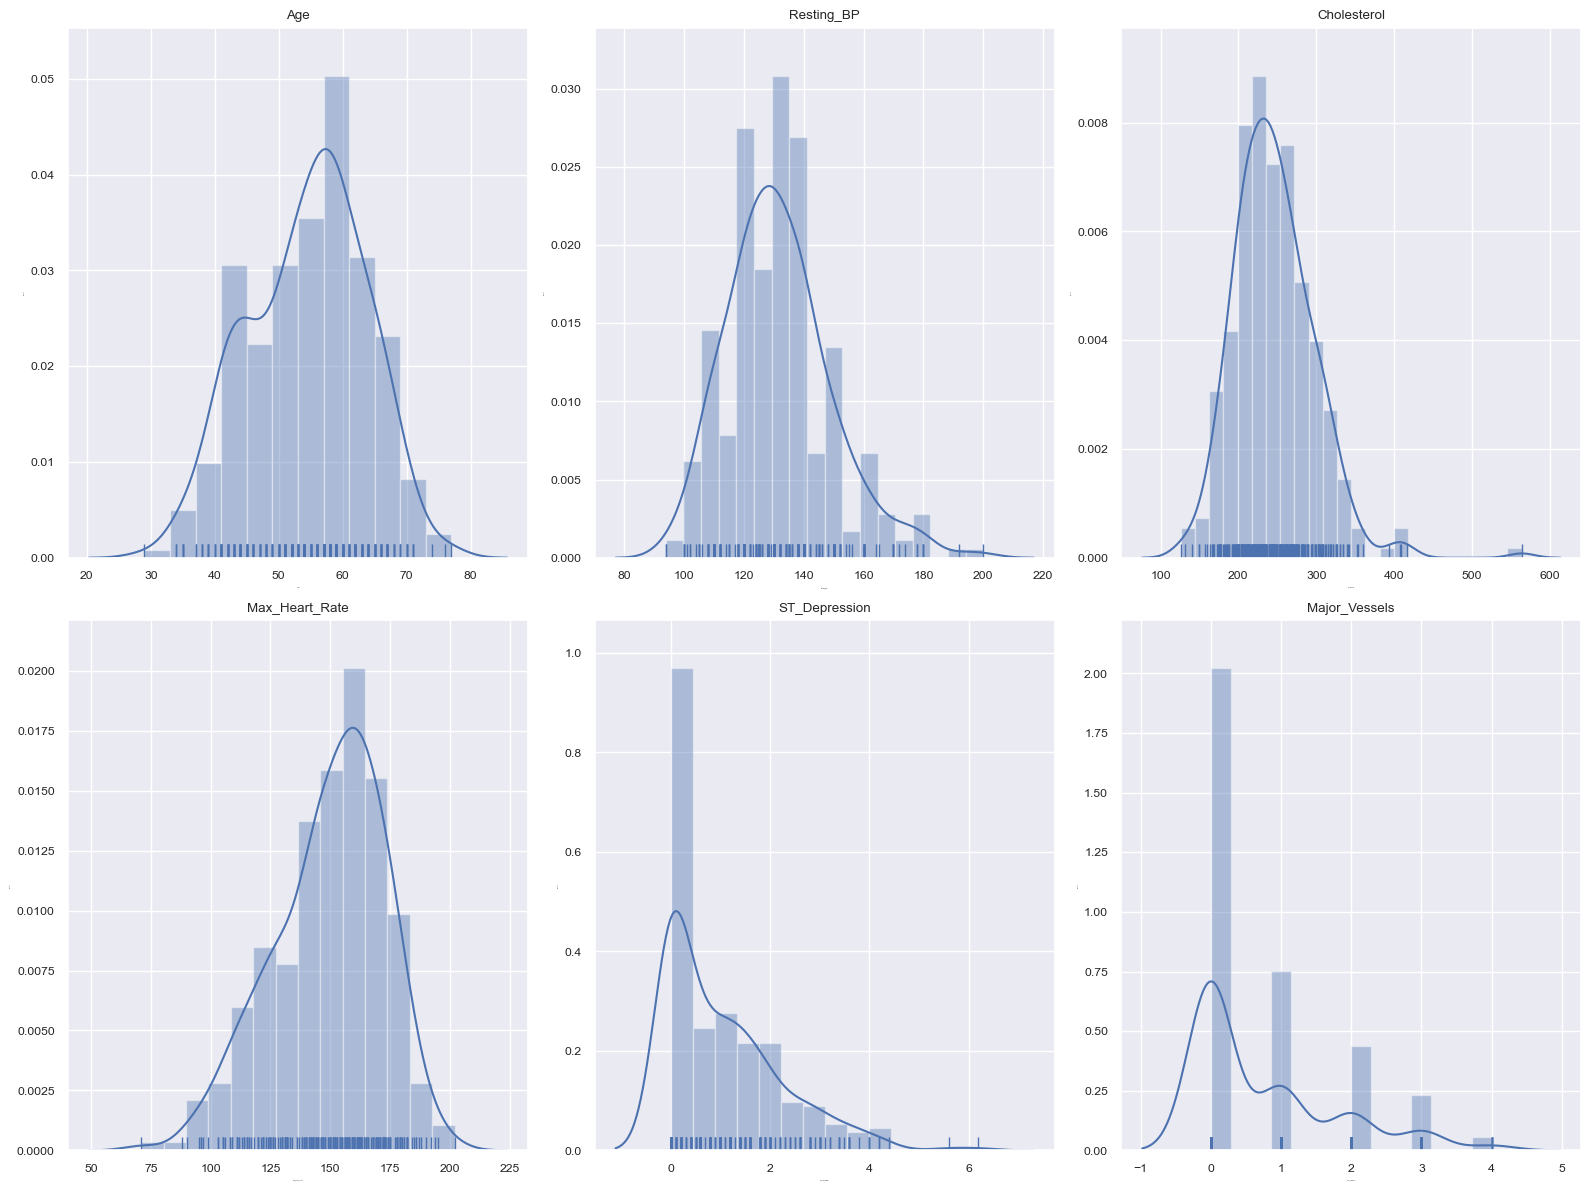

In [674]:
plt.figure(figsize=(16, 12))

pos = 0
for i, variable in enumerate(df.columns):
    if df[variable].dtype != 'object':
        plt.subplot(2, 3, pos + 1)
        sns.distplot(df[variable], rug=True)
        plt.title(variable)
        pos += 1

plt.tight_layout()
plt.show()

**Note**:
- The *Age* variable has a normal distribution;
- The *Resting Blood Pressure* variable has a normal distribution;
- The *Serum Cholesterol* variable has a normal distribution, but it exhibits a relatively high number of outliers on the right side;
- The *Maximum Heart Rate* variable has a slightly left-skewed distribution;
- The *ST Depression* variable has a right-skewed distribution;
- The *Number of Major Vessels* variable has a multimodal distribution.

In [675]:
# From UT Austin Computer Science Department
# Use this function to create a combo boxplot and histogram for continuous (I/R --> int64 and float) variables

def boxplot_histogram(feature, figsize=(12,8), bins = None):
    sns.set(font_scale=2) 
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, 
                                           sharex = True,
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    sns.boxplot(feature, orient="h", ax=ax_box2, showmeans=True, color='red') # mean value will be noted
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2, fit=norm)
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    plt.axvline(feature.mode()[0], color='r', linestyle='dashed', linewidth=1); #Add mode 

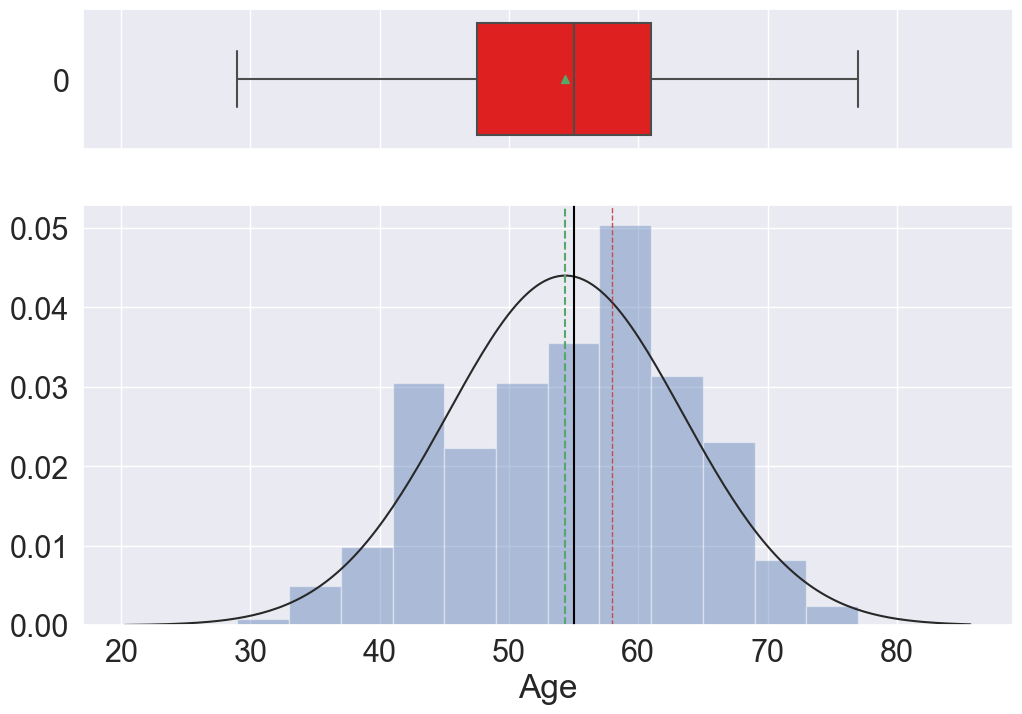

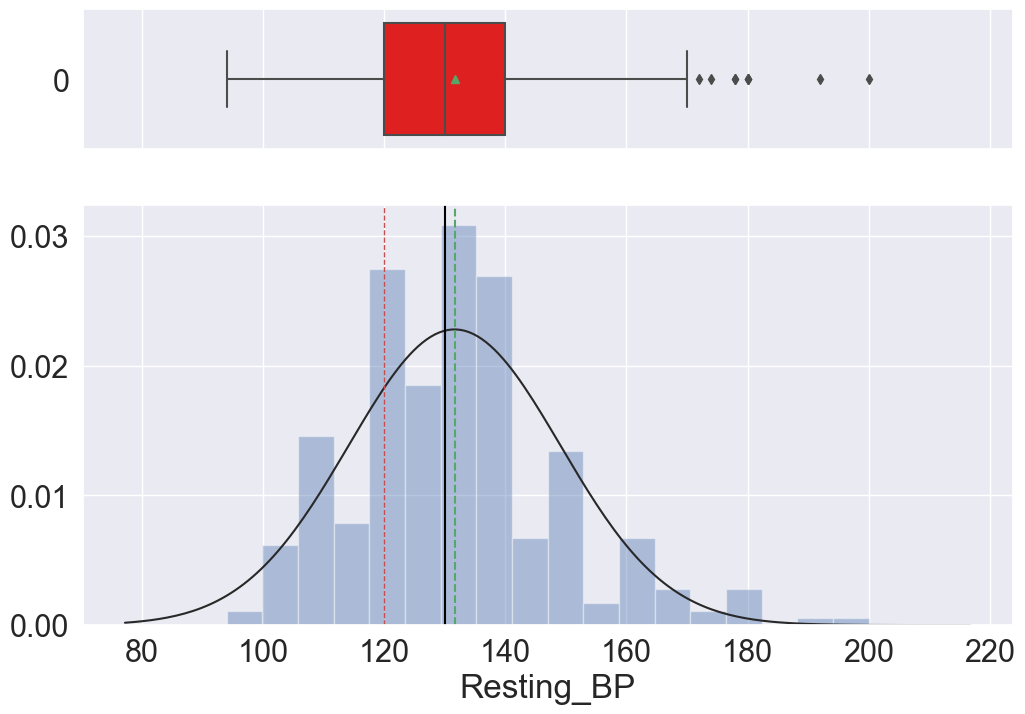

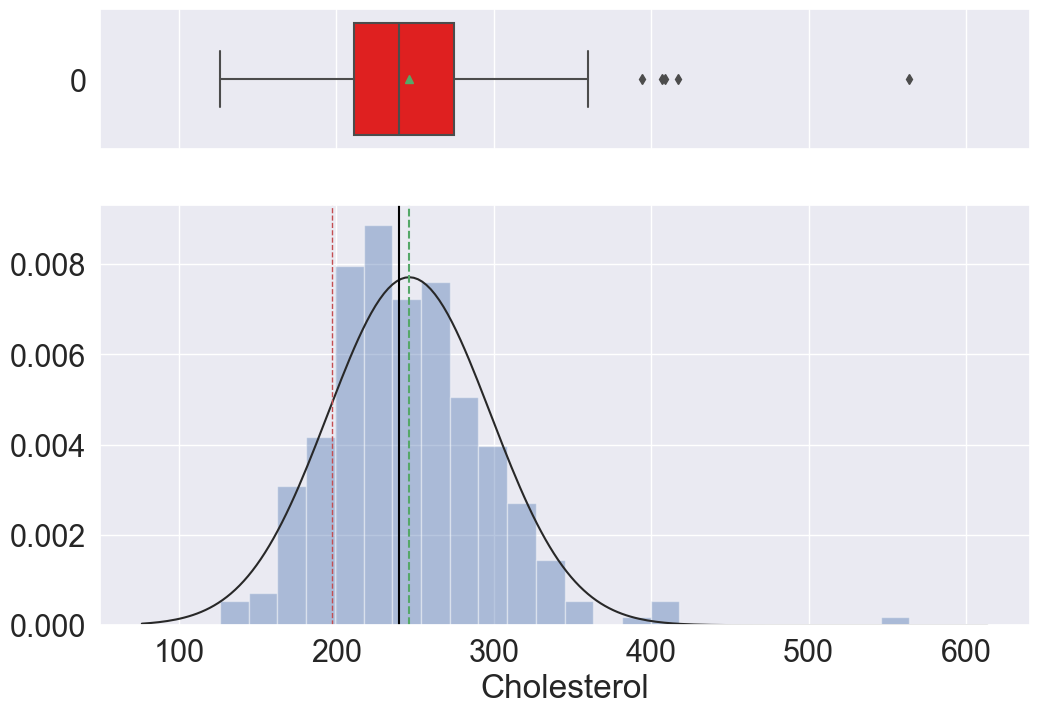

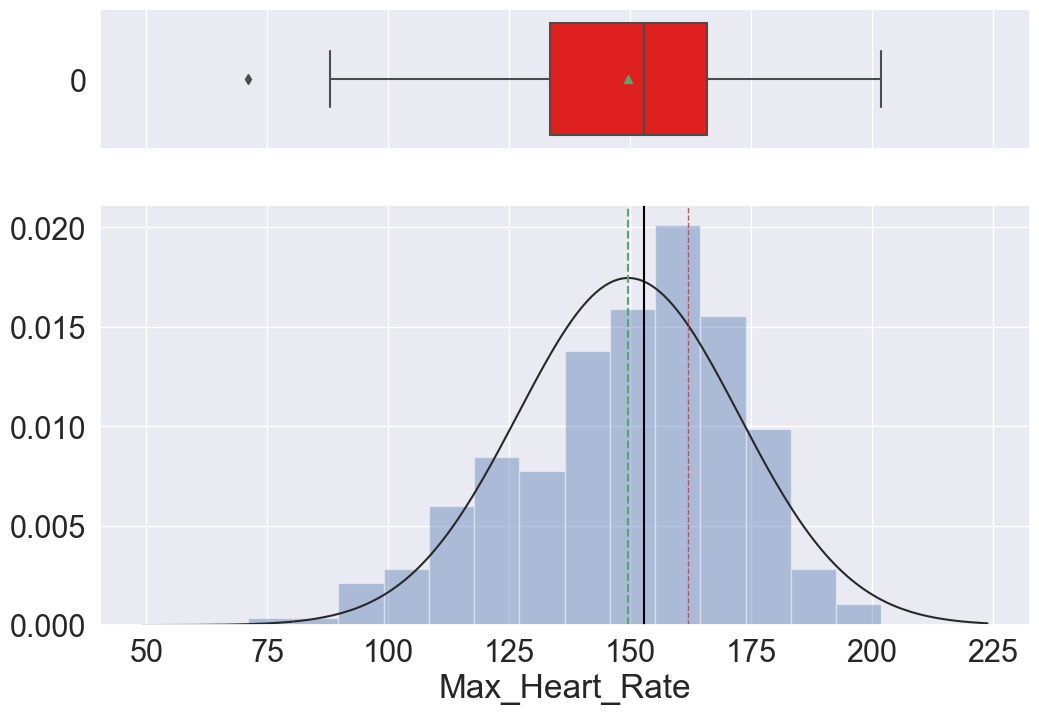

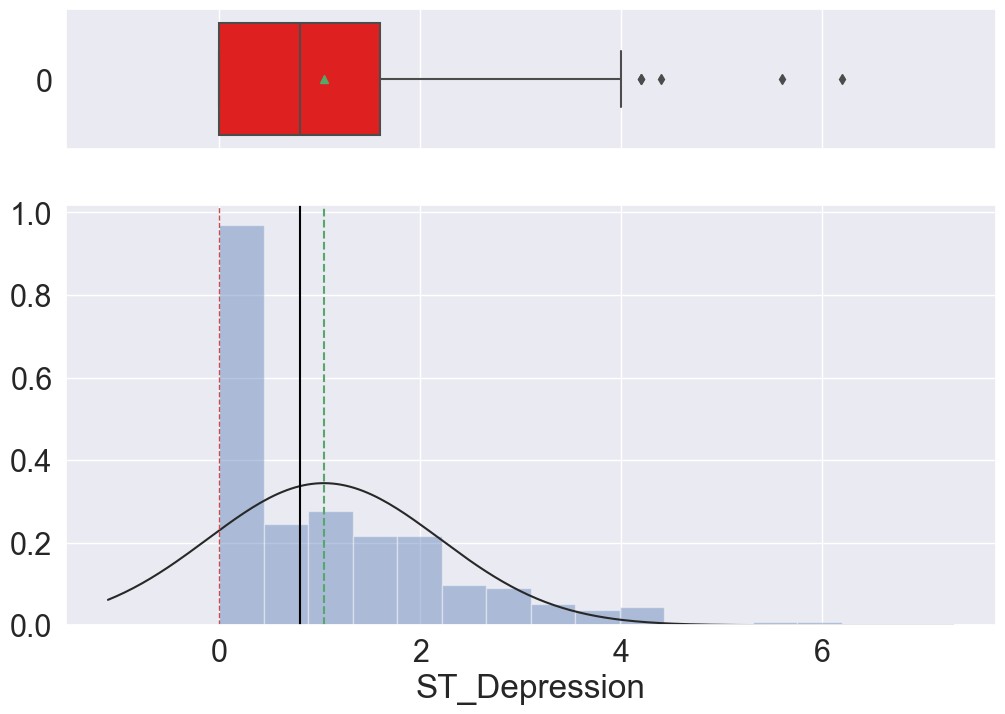

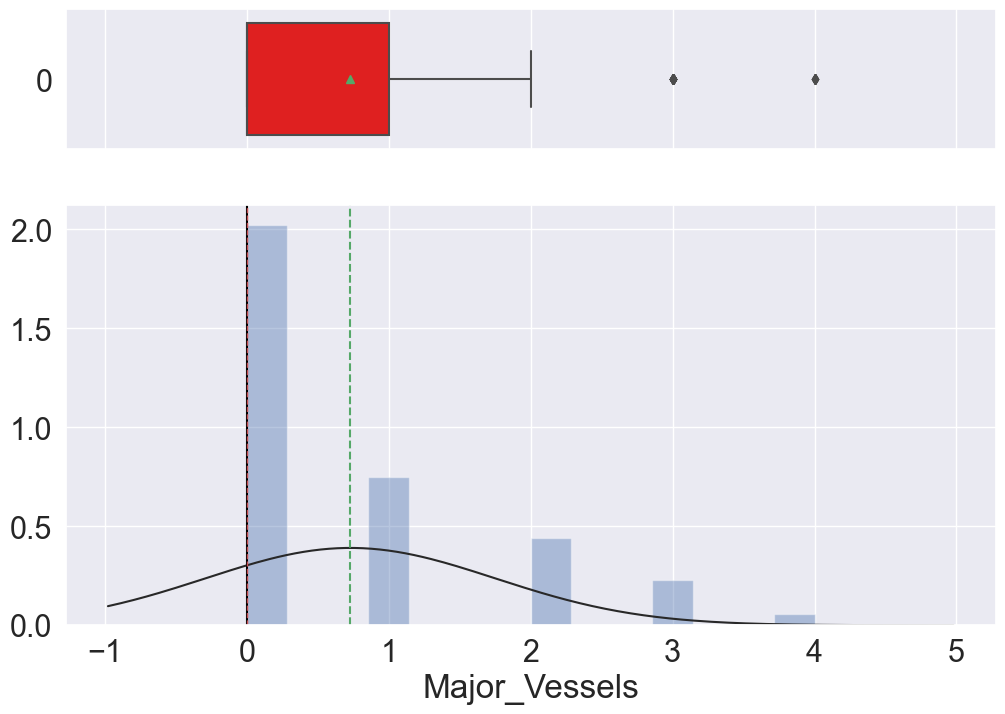

In [676]:
# Boxplot for all continuous variables
for col in df.columns:
    if df[col].dtype != 'object':
        boxplot_histogram(df[col], figsize=(12,8))

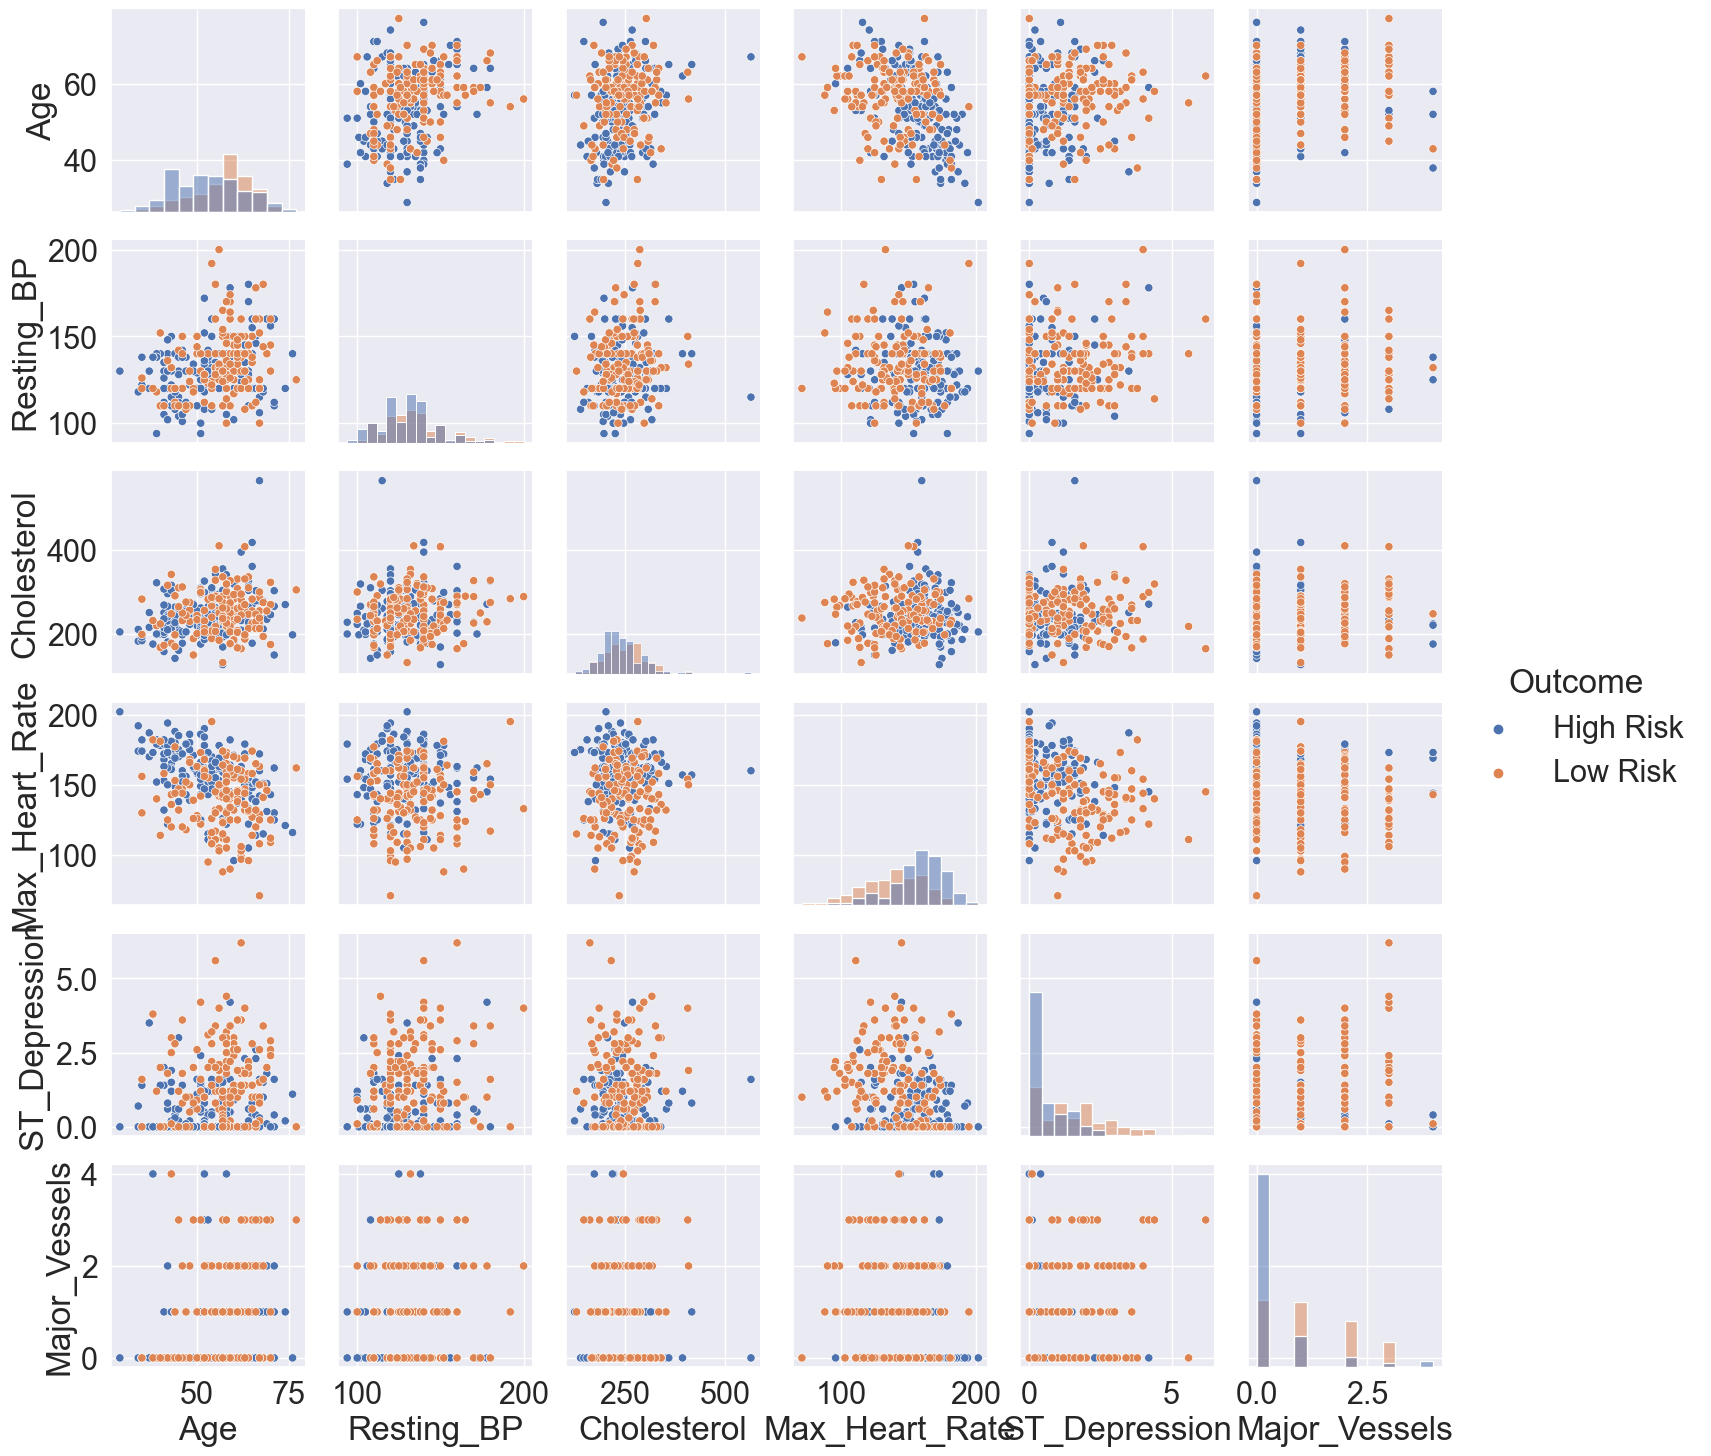

In [677]:
sns.pairplot(df, hue='Outcome', diag_kind='hist');

In [678]:
df['Outcome'].value_counts()

High Risk    165
Low Risk     138
Name: Outcome, dtype: int64

In [679]:
# Function to create plot for categorical

def barplot(ax, feature):
    total = len(feature) # column length
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage in each category class
        x = p.get_x() + p.get_width() / 2 - 0.05 # plot width
        y = p.get_y() + p.get_height() # plot height
        ax.annotate(percentage, (x, y), size=12)
    plt.show()

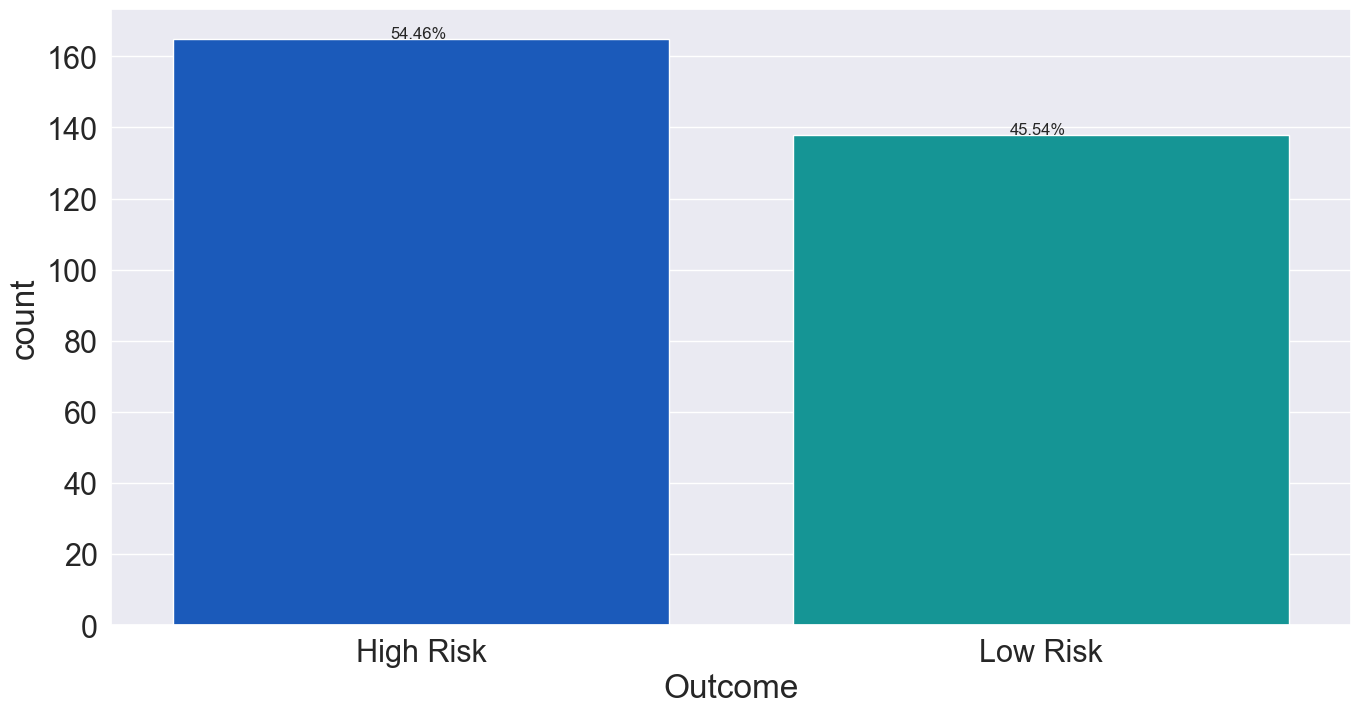

In [680]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(x=df['Outcome'], data=df, palette='winter')
barplot(ax, df['Outcome'])

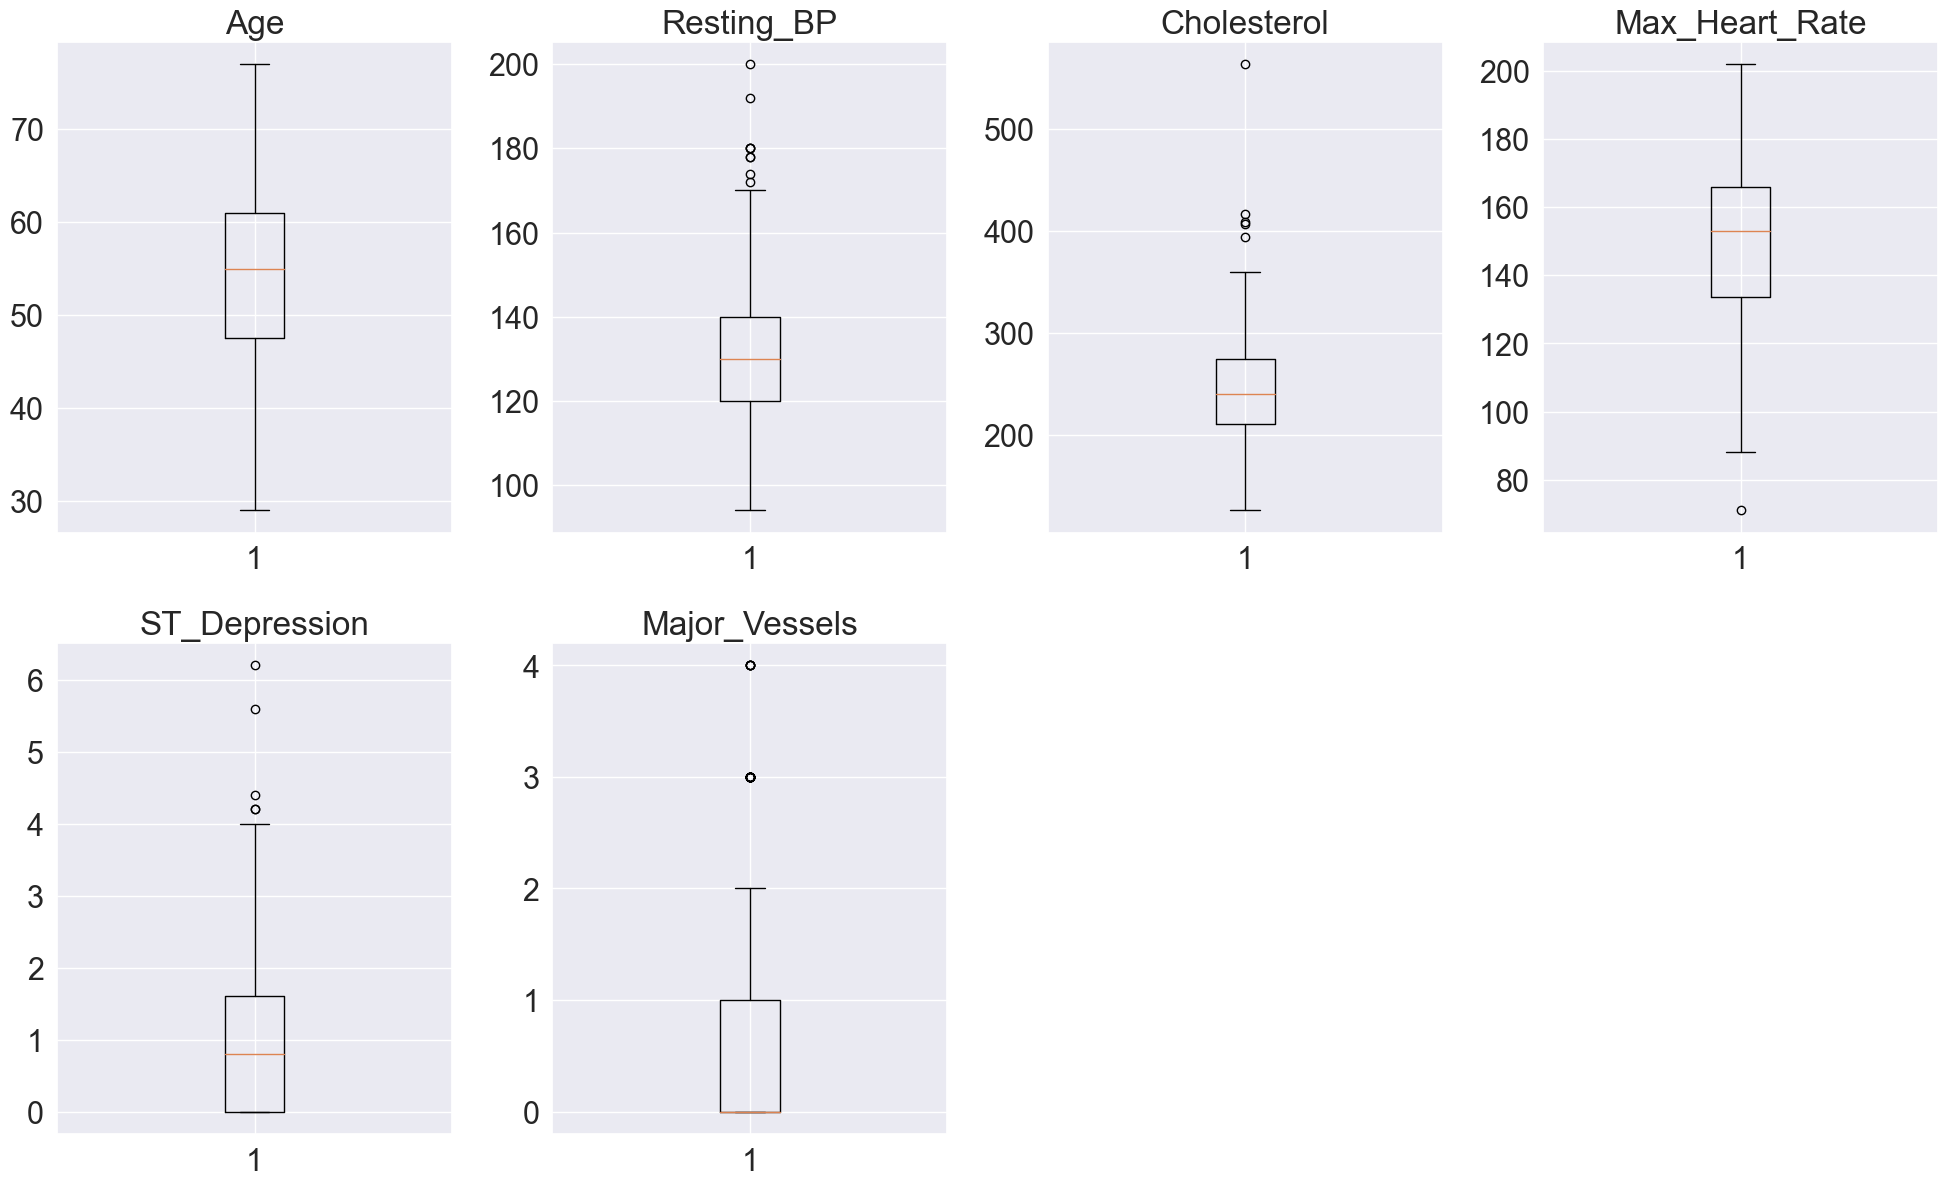

In [681]:
# Outlier detection using boxplots (for all I/R variables)
plt.figure(figsize=(20,30))

pos = 0
for i, variable in enumerate(df):
    if df[variable].dtype != 'object':
        plt.subplot(5,4,pos+1)
        plt.boxplot(df[variable],whis=1.5)
        plt.tight_layout()
        plt.title(variable)
        pos += 1
                    
plt.show()

### Bivariate Analyses

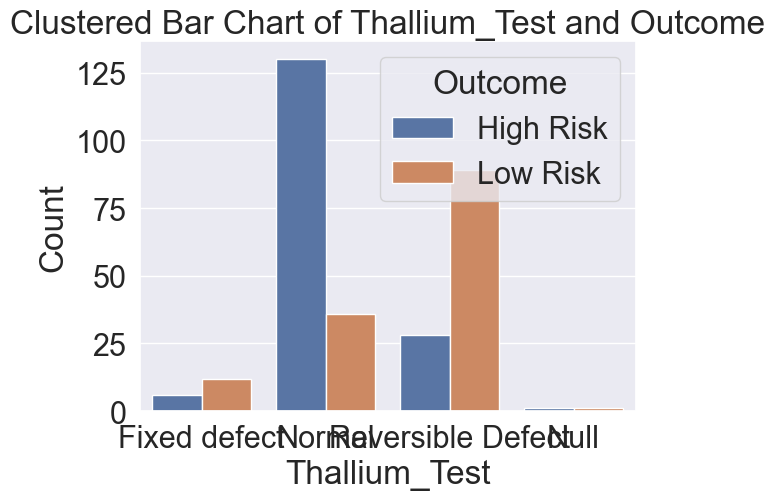

In [682]:
crosstab = pd.crosstab(df['Thallium_Test'], df['Outcome'])

# Plot a clustered bar chart
sns.countplot(data=df, x='Thallium_Test', hue='Outcome')
plt.xlabel('Thallium_Test')
plt.ylabel('Count')
plt.title('Clustered Bar Chart of Thallium_Test and Outcome')
plt.legend(title='Outcome')
plt.show()

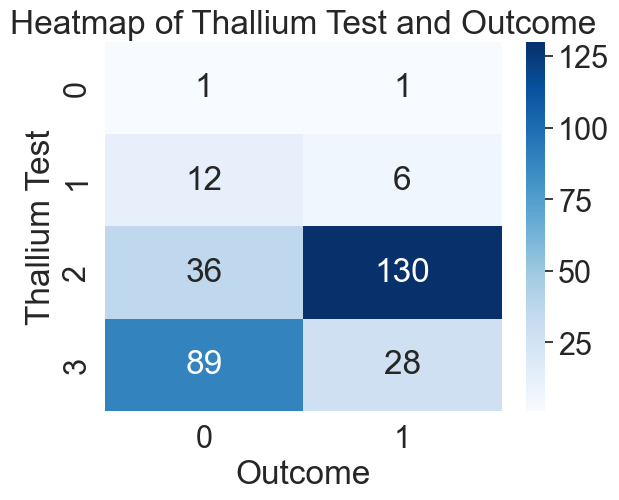

In [756]:
# Create a cross-tabulation of the two categorical variables
crosstab = pd.crosstab(df['Thallium_Test'], df['Outcome'])

# Create a heatmap
sns.heatmap(crosstab, cmap='Blues', annot=True, fmt='d')
plt.xlabel('Outcome')
plt.ylabel('Thallium Test')
plt.title('Heatmap of Thallium Test and Outcome')
plt.show()

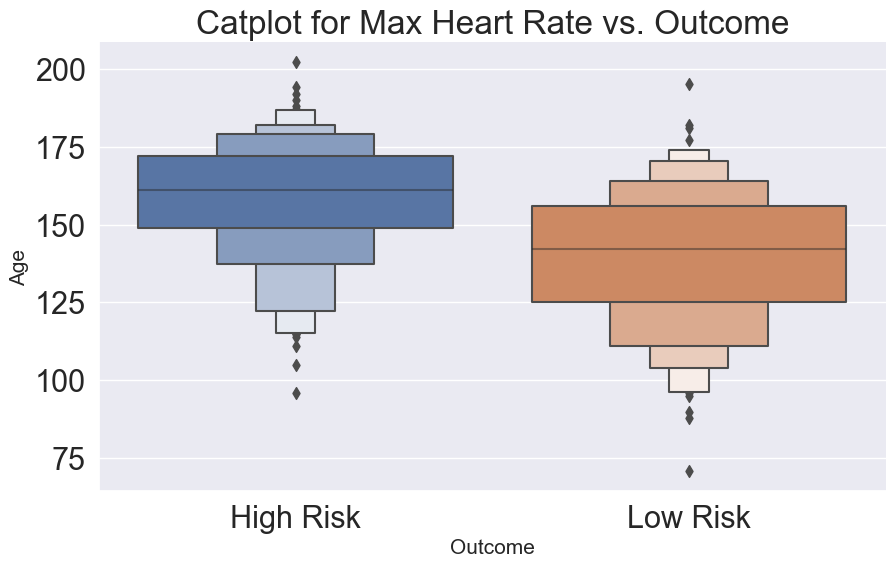

In [684]:
# Catplot
sns.catplot(x="Outcome", y="Max_Heart_Rate", data=df, kind='boxen', height=6, aspect=1.6, estimator=np.mean);
plt.xlabel('Outcome', fontsize=15);
plt.title('Catplot for Max Heart Rate vs. Outcome')
plt.ylabel('Age', fontsize=15);

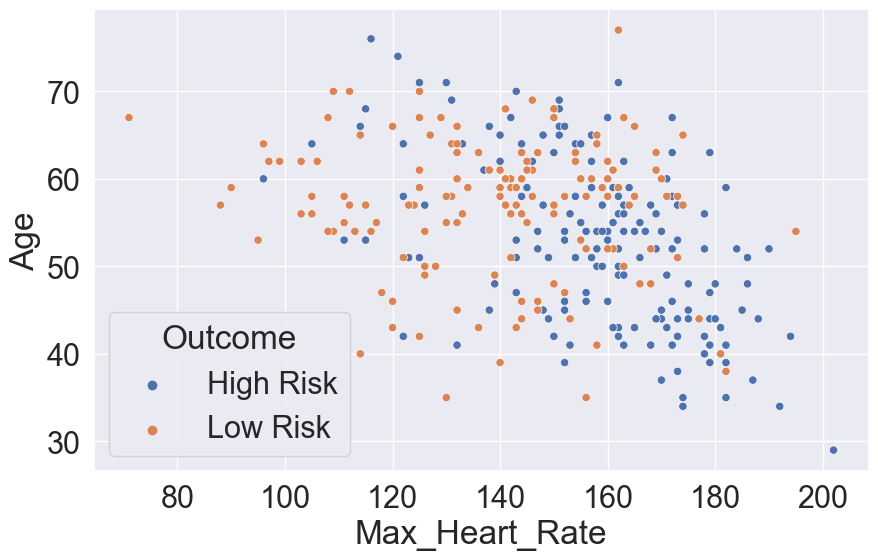

In [685]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='Age', x='Max_Heart_Rate', hue='Outcome', data=df);

**Note:** The correlation between the *Max Heart Rate* and the *Output* is also visible in the catplot. The higher the maximum heart rate, the higher the risk of heart attack.

#### Comparing the Age with the Outcome

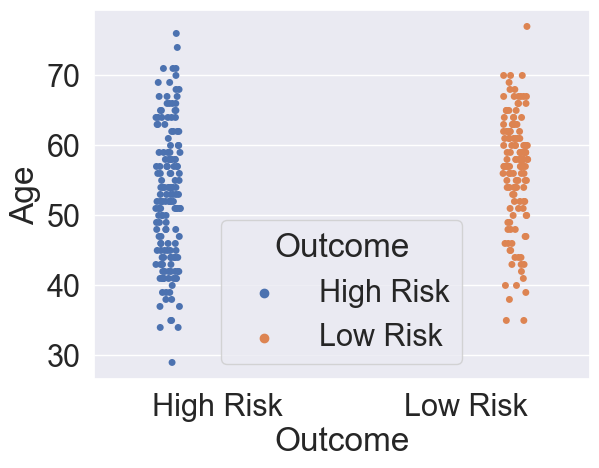

In [686]:
sns.stripplot(data=df, x='Outcome', y='Age', jitter=True, hue='Outcome', dodge=True);

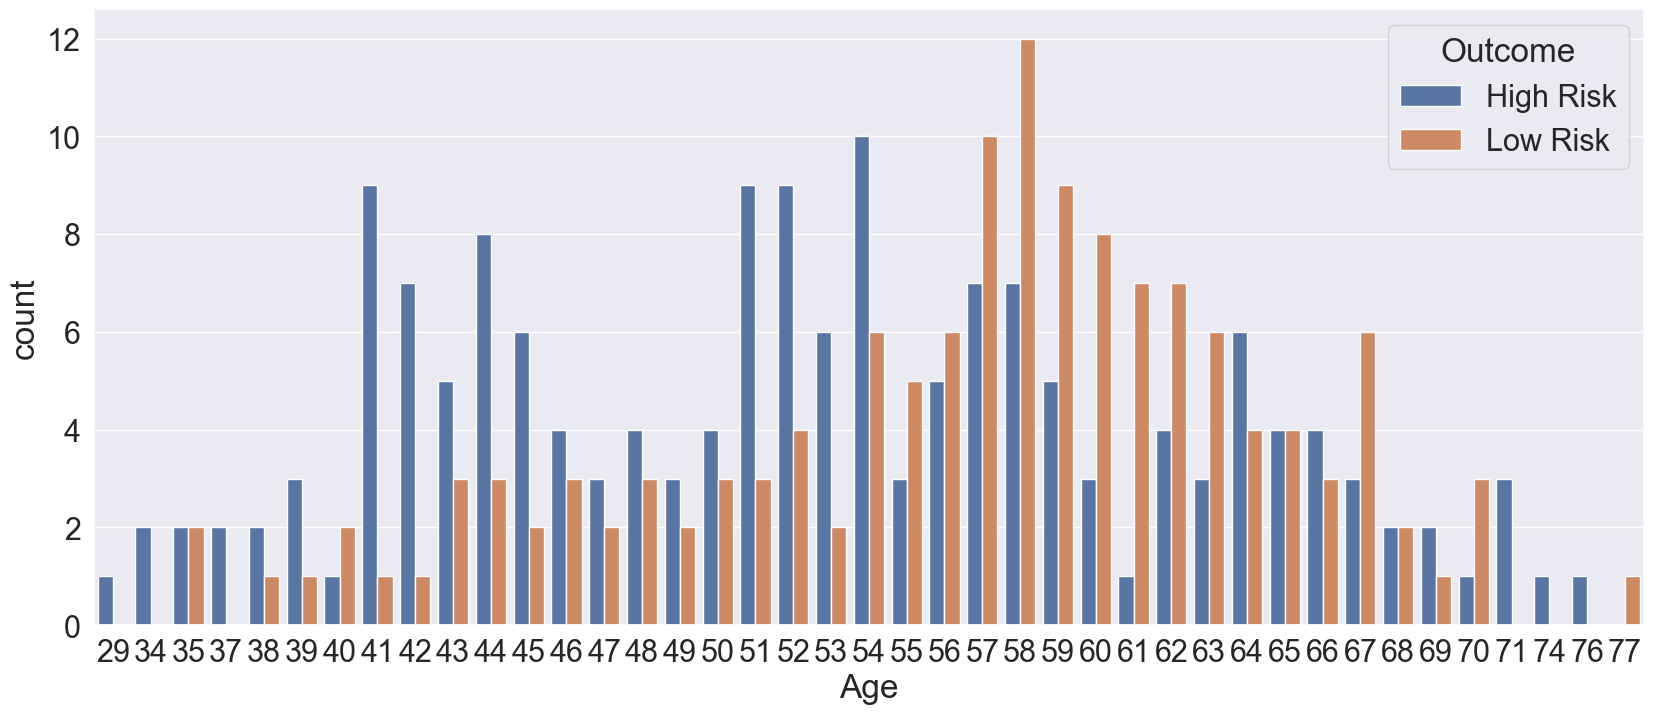

In [687]:
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='Age', hue='Outcome');

**Note:** The *age* of the pacients surprinsingly seem to have an inverse relationship with the *risk of heart attack*. The older the pacient, the lower the risk of heart attack, although the relationship is not very strong.

## Code to Treat Outliers

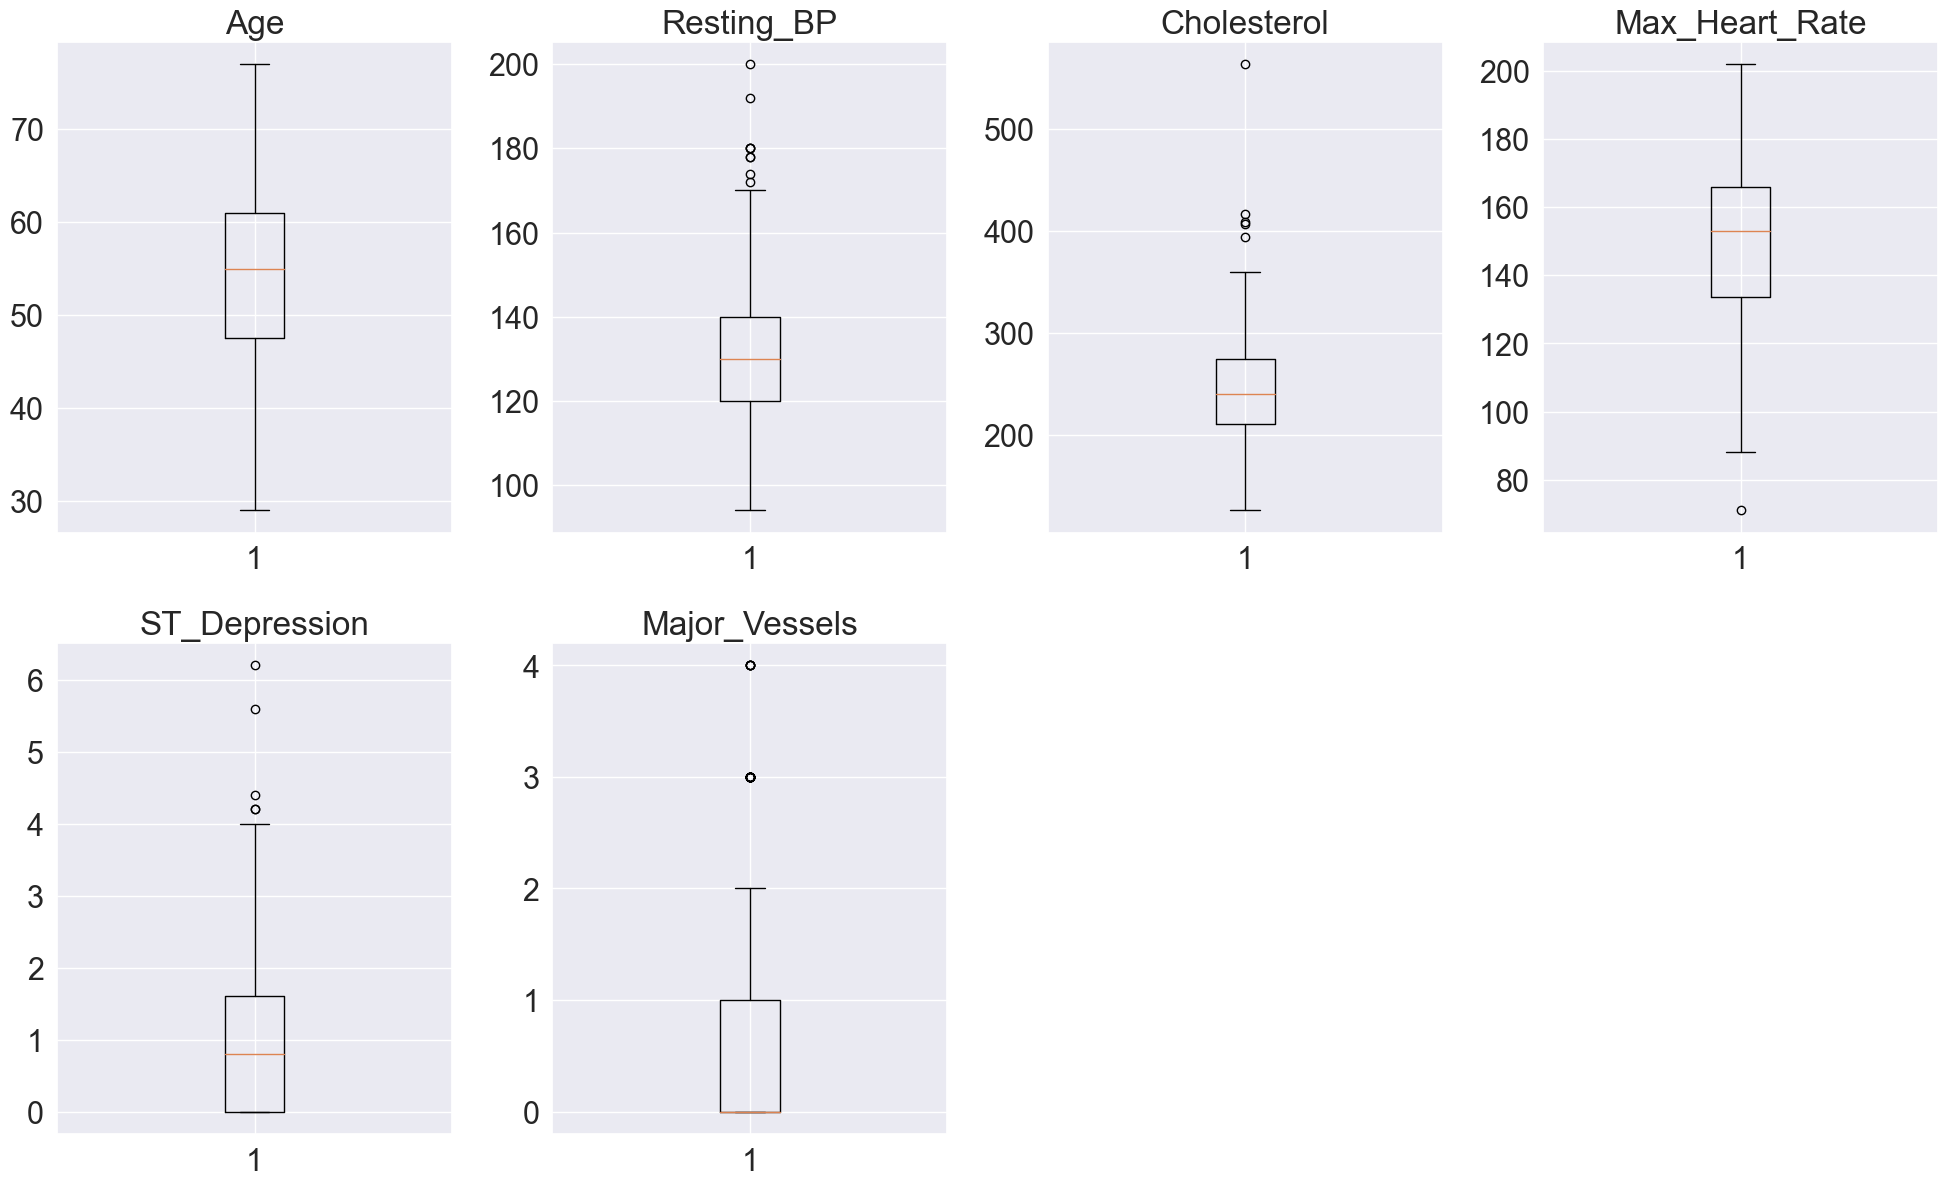

In [688]:
# Outlier detection using boxplots (for all I/R variables)

plt.figure(figsize=(20,30))

pos = 0
for i, variable in enumerate(df):
    if df[variable].dtype != 'object':
      plt.subplot(5,4,pos+1)
      plt.boxplot(df[variable],whis=1.5)
      plt.tight_layout()
      plt.title(variable)
      pos += 1
                    
plt.show()

In [689]:
# Use flooring and capping method
def treat_outliers(df,col):
    '''
    col: str, name of the numerical variable
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) 
    Q3=df[col].quantile(0.75) 
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)                                                            
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
    return df

In [690]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

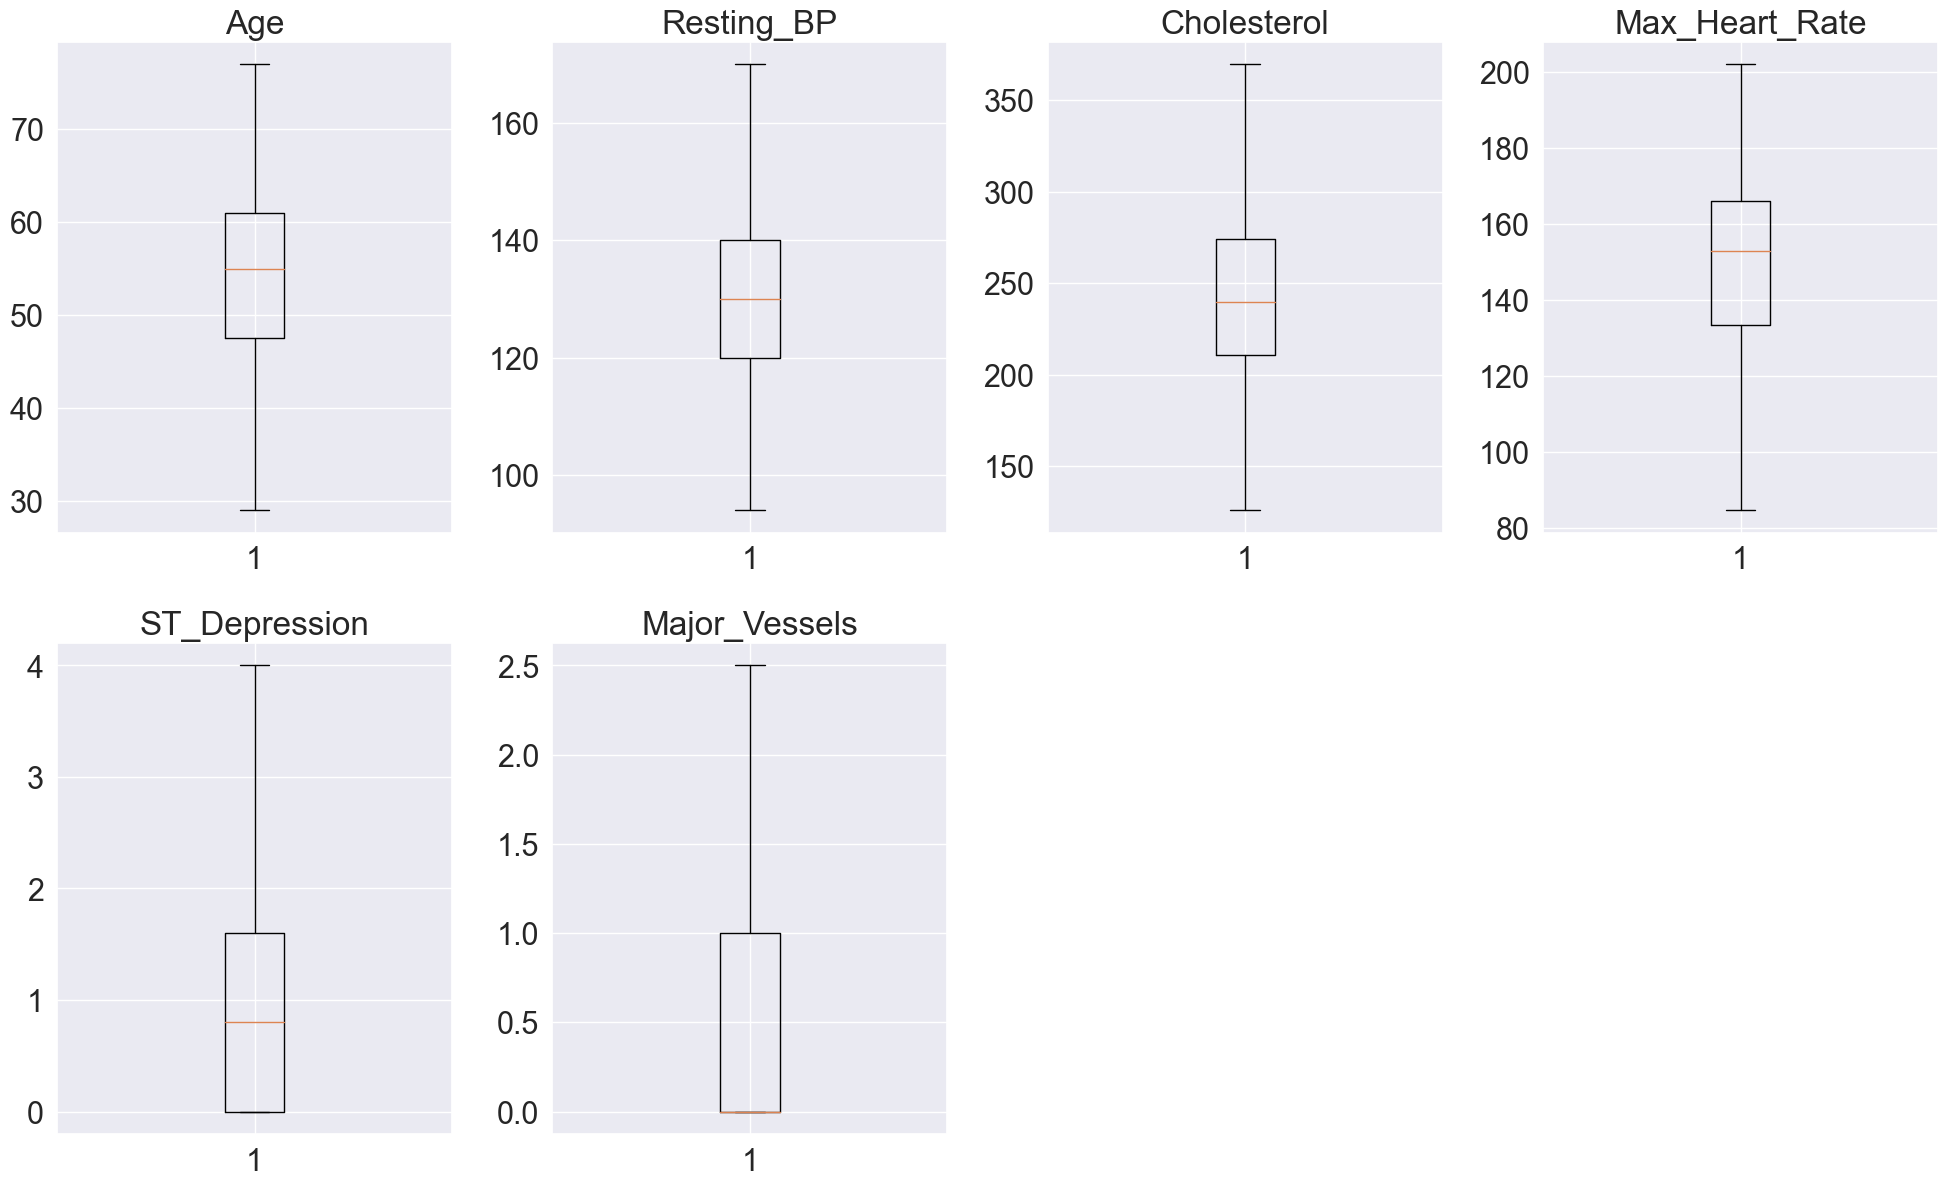

In [691]:
plt.figure(figsize=(20,30))

pos = 0
for i, variable in enumerate(df):
    if df[variable].dtype != 'object':
      plt.subplot(5,4,pos+1)
      plt.boxplot(df[variable],whis=1.5)
      plt.tight_layout()
      plt.title(variable)
      pos += 1
                    
plt.show()

### Replacing categorical values with numerical values

In [692]:
np.random.seed()
df.sample(n=15).T

120                    91   \
Age                                 64                     57   
Gender                               F                      M   
Chest_Pain              Typical Angina         Typical Angina   
Resting_BP                         130                    132   
Cholesterol                     303.00                 207.00   
Fasting_Sugar              <= 120mg/ml            <= 120mg/ml   
Resting_ECG      ST-T Wave Abnormality  ST-T Wave Abnormality   
Max_Heart_Rate                  122.00                 168.00   
Exercise_Angina                     No                    Yes   
ST_Depression                     2.00                   0.00   
ST_Slope                          Flat            Downsloping   
Major_Vessels                     2.00                   0.00   
Thallium_Test                   Normal      Reversible Defect   
Outcome                      High Risk              High Risk   

                                   126                    7    \
Age                                 47                     44   
Gender                               M                      M   
Chest_Pain              Typical Angina        Atypical Angina   
Resting_BP                         112                    120   
Cholesterol                     204.00                 263.00   
Fasting_Sugar              <= 120mg/ml            <= 120mg/ml   
Resting_ECG      ST-T Wave Abnormality  ST-T Wave Abnormality   
Max_Heart_Rate                  143.00                 173.00   
Exercise_Angina                     No                     No   
ST_Depression                     0.10                   0.00   
ST_Slope                   Downsloping            Downsloping   
Major_Vessels                     0.00                   0.00   
Thallium_Test                   Normal      Reversible Defect   
Outcome                      High Risk              High Risk   

                                   135                    52              179  \
Age                                 49                     62              57   
Gender                               F                      M               M   
Chest_Pain              Typical Angina       Non-Anginal Pain  Typical Angina   
Resting_BP                         130                    130             150   
Cholesterol                     269.00                 231.00          276.00   
Fasting_Sugar              <= 120mg/ml            <= 120mg/ml     <= 120mg/ml   
Resting_ECG      ST-T Wave Abnormality  ST-T Wave Abnormality          Normal   
Max_Heart_Rate                  163.00                 146.00          112.00   
Exercise_Angina                     No                     No             Yes   
ST_Depression                     0.00                   1.80            0.60   
ST_Slope                   Downsloping                   Flat            Flat   
Major_Vessels                     0.00                   2.50            1.00   
Thallium_Test                   Normal      Reversible Defect    Fixed defect   
Outcome                      High Risk              High Risk        Low Risk   

                                   98                     282  \
Age                                 43                     59   
Gender                               M                      M   
Chest_Pain            Non-Anginal Pain       Non-Anginal Pain   
Resting_BP                         130                    126   
Cholesterol                     315.00                 218.00   
Fasting_Sugar              <= 120mg/ml             > 120mg/ml   
Resting_ECG      ST-T Wave Abnormality  ST-T Wave Abnormality   
Max_Heart_Rate                  162.00                 134.00   
Exercise_Angina                     No                     No   
ST_Depression                     1.90                   2.20   
ST_Slope                   Downsloping                   Flat   
Major_Vessels                     1.00                   1.00   
Thallium_Test         

In [693]:
# Replacing categorical variables back to original values
df['Gender'] = df['Gender'].replace({'F': 0, 'M': 1})
df['Gender'] = df['Gender'].astype('int')

df['Chest_Pain'] = df['Chest_Pain'].replace({'Typical Angina': 0, 'Atypical Angina': 1, 'Non-Anginal Pain': 2, 'Asymptomatic': 3})
df['Chest_Pain'] = df['Chest_Pain'].astype('int')

df['Fasting_Sugar'] = df['Fasting_Sugar'].replace({'<= 120mg/ml': 0, '> 120mg/ml': 1})
df['Fasting_Sugar'] = df['Fasting_Sugar'].astype('int')

df['Resting_ECG'] = df['Resting_ECG'].replace({'Normal': 0, 'ST-T Wave Abnormality': 1, 'Left Ventricular Hypertrophy': 2})
df['Resting_ECG'] = df['Resting_ECG'].astype('int')

df['Exercise_Angina'] = df['Exercise_Angina'].replace({'No': 0, 'Yes': 1})
df['Exercise_Angina'] = df['Exercise_Angina'].astype('int')

df['ST_Slope'] = df['ST_Slope'].replace({'Upsloping': 0, 'Flat': 1, 'Downsloping': 2})
df['ST_Slope'] = df['ST_Slope'].astype('int')

df['Thallium_Test'] = df['Thallium_Test'].replace({'Null': 0, 'Fixed defect': 1, 'Normal': 2, 'Reversible Defect': 3})
df['Thallium_Test'] = df['Thallium_Test'].astype('int')

df['Outcome'] = df['Outcome'].replace({'Low Risk': 0, 'High Risk': 1})
df['Outcome'] = df['Outcome'].astype('int')

In [694]:
np.random.seed()
df.sample(n=15).T

42     28     149    32     37     50     130    112  \
Age              45.00  65.00  42.00  44.00  54.00  51.00  54.00  64.00   
Gender            1.00   0.00   1.00   1.00   1.00   0.00   0.00   0.00   
Chest_Pain        0.00   2.00   2.00   1.00   2.00   2.00   2.00   2.00   
Resting_BP      104.00 140.00 130.00 130.00 150.00 130.00 160.00 140.00   
Cholesterol     208.00 369.75 180.00 219.00 232.00 256.00 201.00 313.00   
Fasting_Sugar     0.00   1.00   0.00   0.00   0.00   0.00   0.00   0.00   
Resting_ECG       0.00   0.00   1.00   0.00   0.00   0.00   1.00   1.00   
Max_Heart_Rate  148.00 157.00 150.00 188.00 165.00 149.00 163.00 133.00   
Exercise_Angina   1.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
ST_Depression     3.00   0.80   0.00   0.00   1.60   0.50   0.00   0.20   
ST_Slope          1.00   2.00   2.00   2.00   2.00   2.00   2.00   2.00   
Major_Vessels     0.00   1.00   0.00   0.00   0.00   0.00   1.00   0.00   
Thallium_Test     2.00   2.00   2.00   2.00   3.00   2.00   2.00   3.00   
Outcome           1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   

                   222    300    26     58     104    172    194  
Age              65.00  68.00  59.00  34.00  50.00  58.00  60.00  
Gender            1.00   1.00   1.00   1.00   1.00   1.00   1.00  
Chest_Pain        3.00   0.00   2.00   3.00   2.00   1.00   2.00  
Resting_BP      138.00 144.00 150.00 118.00 129.00 120.00 140.00  
Cholesterol     282.00 193.00 212.00 182.00 196.00 284.00 185.00  
Fasting_Sugar     1.00   1.00   1.00   0.00   0.00   0.00   0.00  
Resting_ECG       0.00   1.00   1.00   0.00   1.00   0.00   0.00  
Max_Heart_Rate  174.00 141.00 157.00 174.00 163.00 160.00 155.00  
Exercise_Angina   0.00   0.00   0.00   0.00   0.00   0.00   0.00  
ST_Depression     1.40   3.40   1.60   0.00   0.00   1.80   3.00  
ST_Slope          1.00   1.00   2.00   2.00   2.00   1.00   1.00  
Major_Vessels     1.00   2.00   0.00   0.00   0.00   0.00   0.00  
Thallium_Test     2.00   3.00   2.00   2.00   2.00   2.00   2.00  
Outcome           0.00   0.00   1.00   1.00   1.00   0.00   0.00

## Supervised Machine Learning (Classification)

In [695]:
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import stats, norm, skew
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn import metrics
from sklearn import datasets

In [696]:
# Make copy of data
data=df.copy()

### Split Data into Train and Test Sets

In [697]:
X = data.drop('Outcome',axis=1)    # Features
y = data['Outcome'].astype('int64') # Labels (Target or Outcome Variable)
# converting target to integers - since some functions might not work with bool type

In [698]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.4, random_state=1)
print(X_train.shape, X_test.shape)

(181, 13) (122, 13)


### Build the model using the Decision Tree Classifier

Notes on Decision Tree: This algorithm recursively builds the tree by sleecting the best feature and threshold based on selected splitting criterion --- this continues until a stopping condition is met (e.g., max depth, minimum samples in leaf node)

Pruning techniques may reduce overfitting by removing branches/leaf nodes --- helps prevent training data memorization

In [699]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

# 2 commonly used splitting criteria are Gini impurity and information gain (entropy)
# Gini: measures the probability of misclassifying a randomly chosen element if it were randomly labeled
    # Would goal be to minimize or maximize the Gini impurity when making splits???
    # MINIMIZE
    
    
# Information Gain (Entropy): entropy measures impurity or uncertainty, while information gain quantifies reduction in entropy
    # Which do we want to minimize? Maximize?
    # MINIMIZE Entropy
    # MAXIMIZE Information Gain

In [700]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [701]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

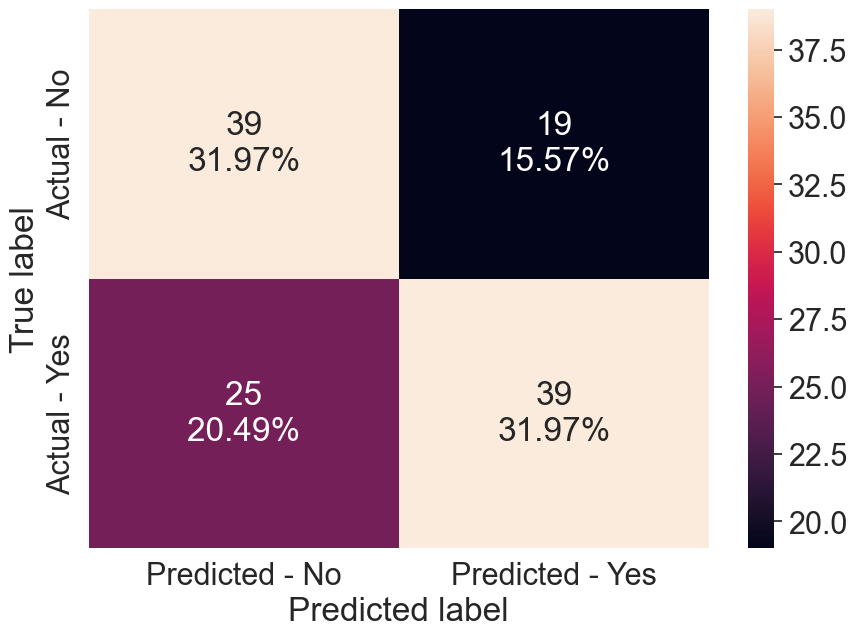

In [702]:
make_confusion_matrix(model,y_test)

In [703]:
y_train.value_counts(1)

1   0.56
0   0.44
Name: Outcome, dtype: float64

In [704]:
##  Function to calculate recall score
def get_recall_score(model):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [705]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.609375


### There is a large difference between training and testing set, thus this model appears to be overfitting the data

In [706]:
column_names = list(data.columns)
column_names.remove('Outcome')  # As this is the DV                
feature_names = column_names
print(feature_names)

['Age', 'Gender', 'Chest_Pain', 'Resting_BP', 'Cholesterol', 'Fasting_Sugar', 'Resting_ECG', 'Max_Heart_Rate', 'Exercise_Angina', 'ST_Depression', 'ST_Slope', 'Major_Vessels', 'Thallium_Test']


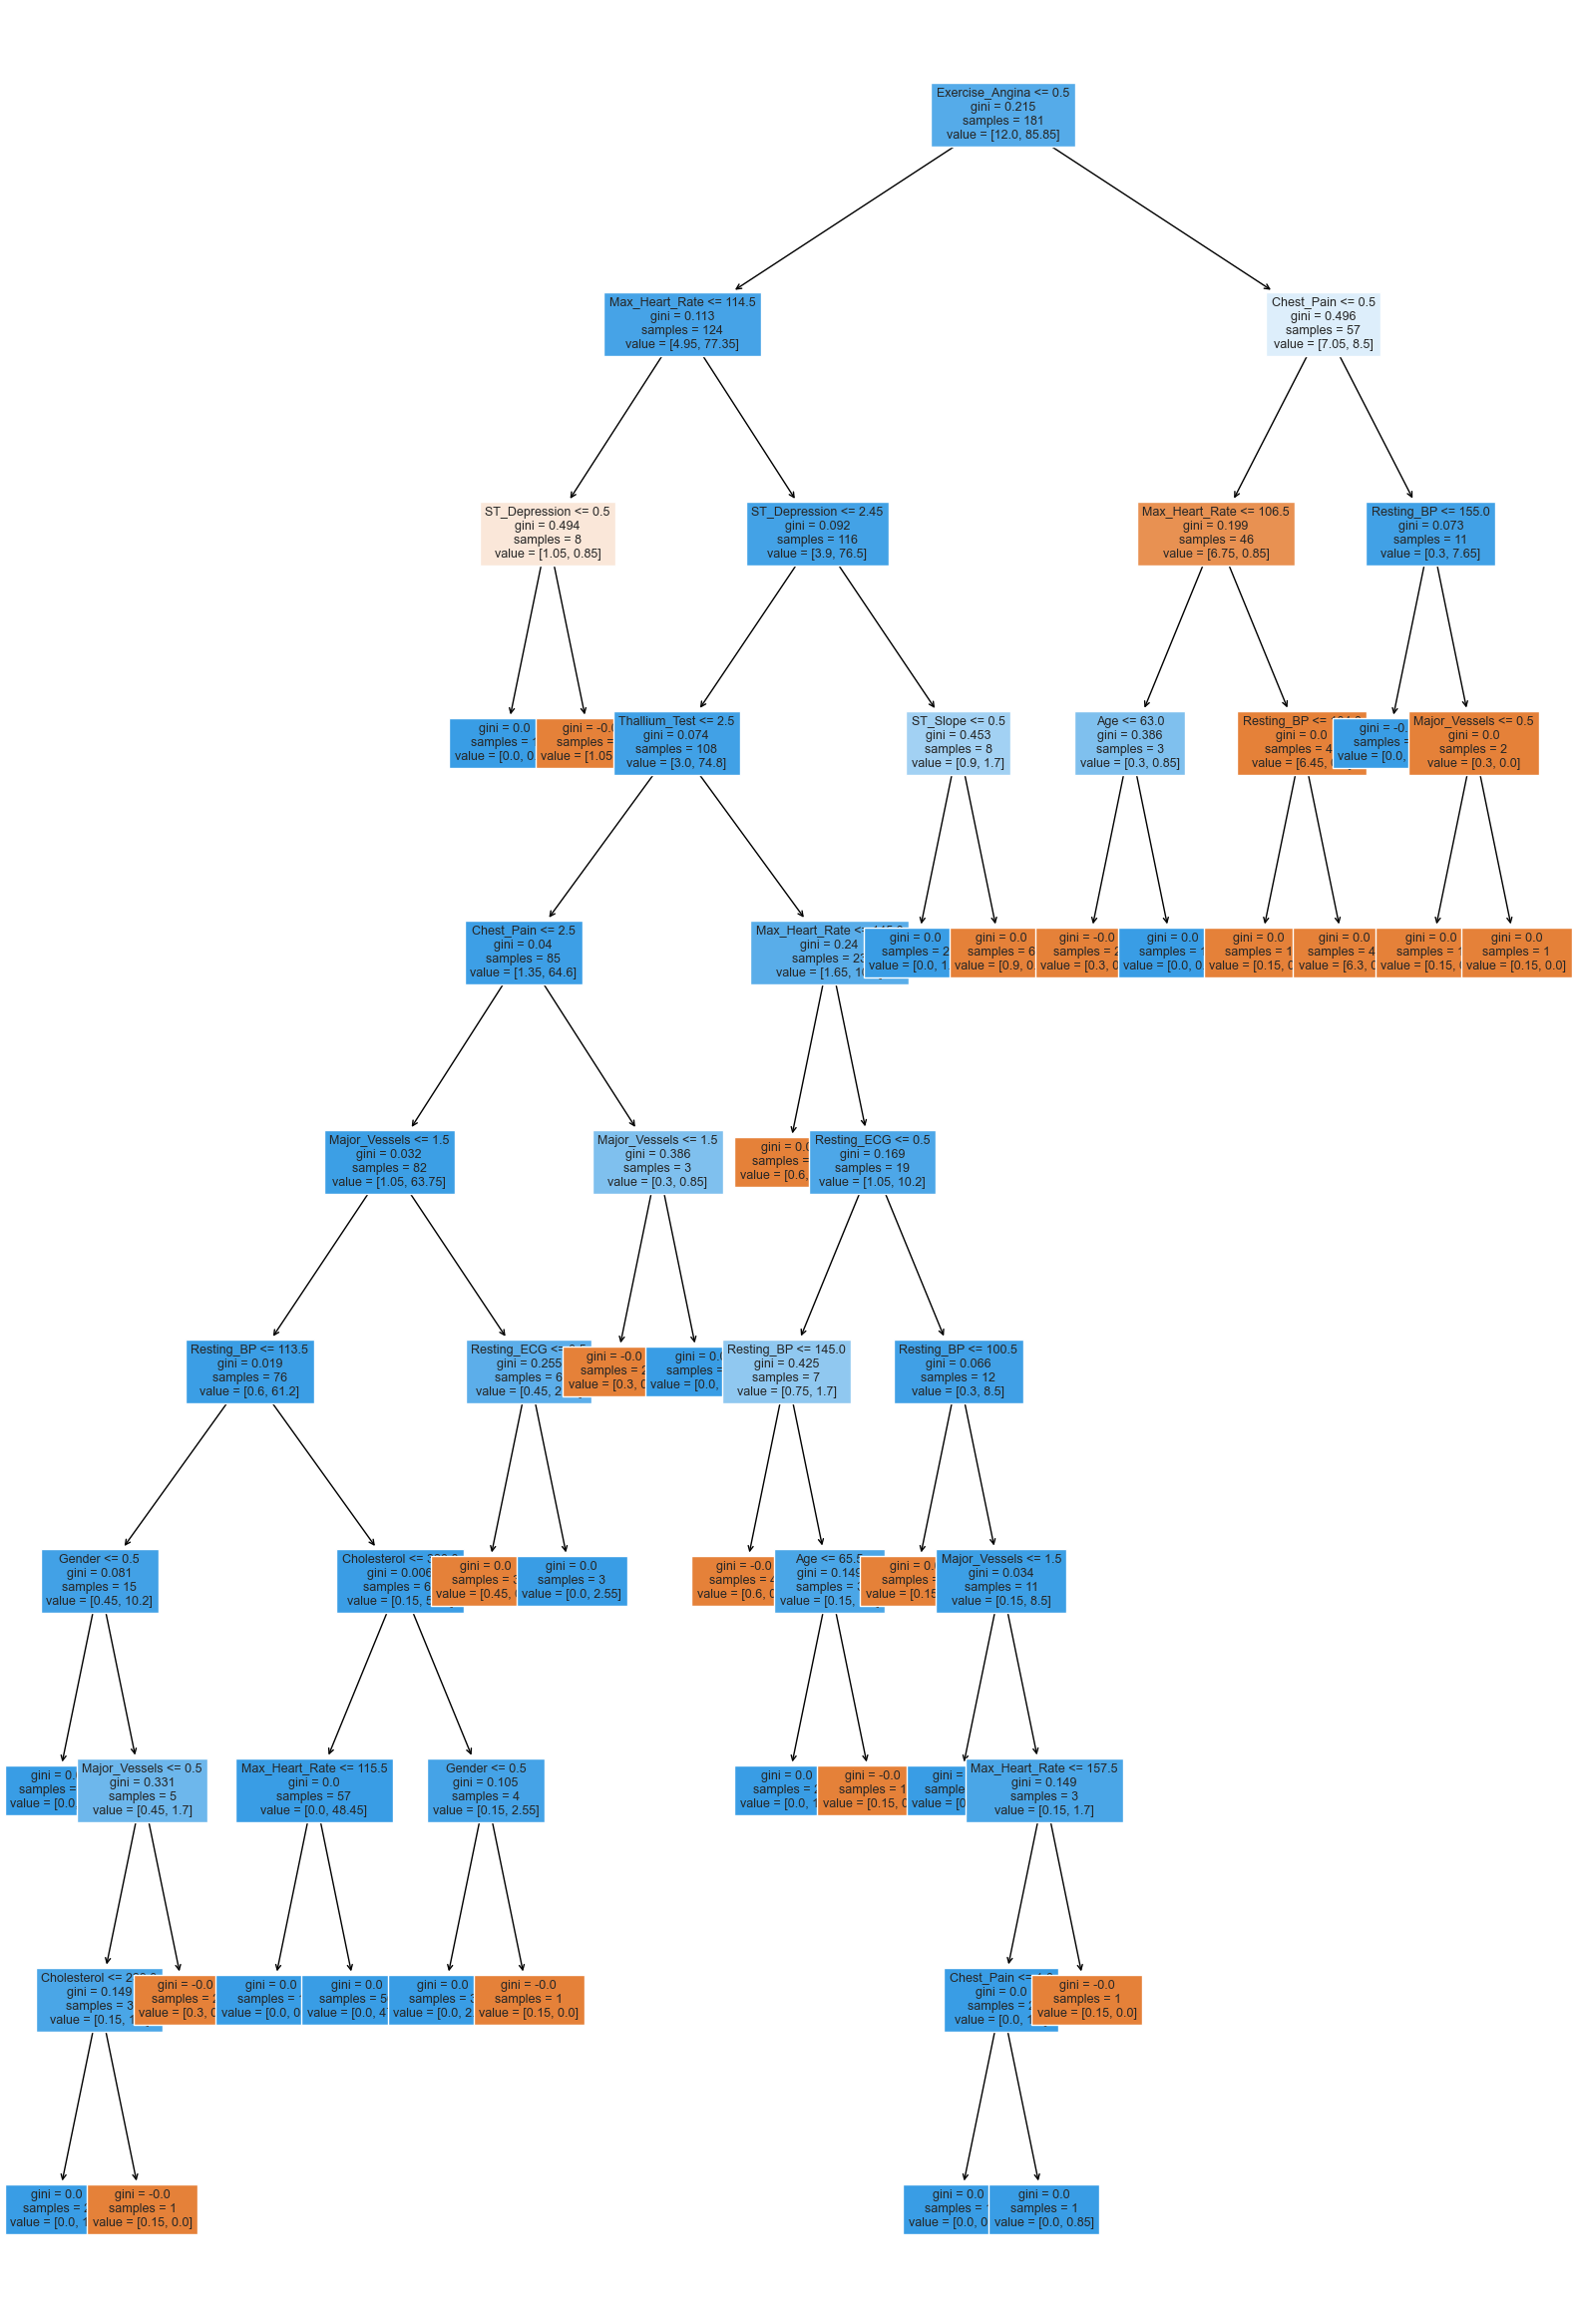

In [707]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
# Code below will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [708]:
# Importance of features in the tree building (The importance of a feature is computed as the 
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance)

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                 Imp
Chest_Pain      0.27
Exercise_Angina 0.19
Max_Heart_Rate  0.15
Resting_BP      0.08
ST_Depression   0.07
ST_Slope        0.06
Resting_ECG     0.05
Major_Vessels   0.05
Age             0.03
Gender          0.02
Cholesterol     0.01
Thallium_Test   0.01
Fasting_Sugar   0.00


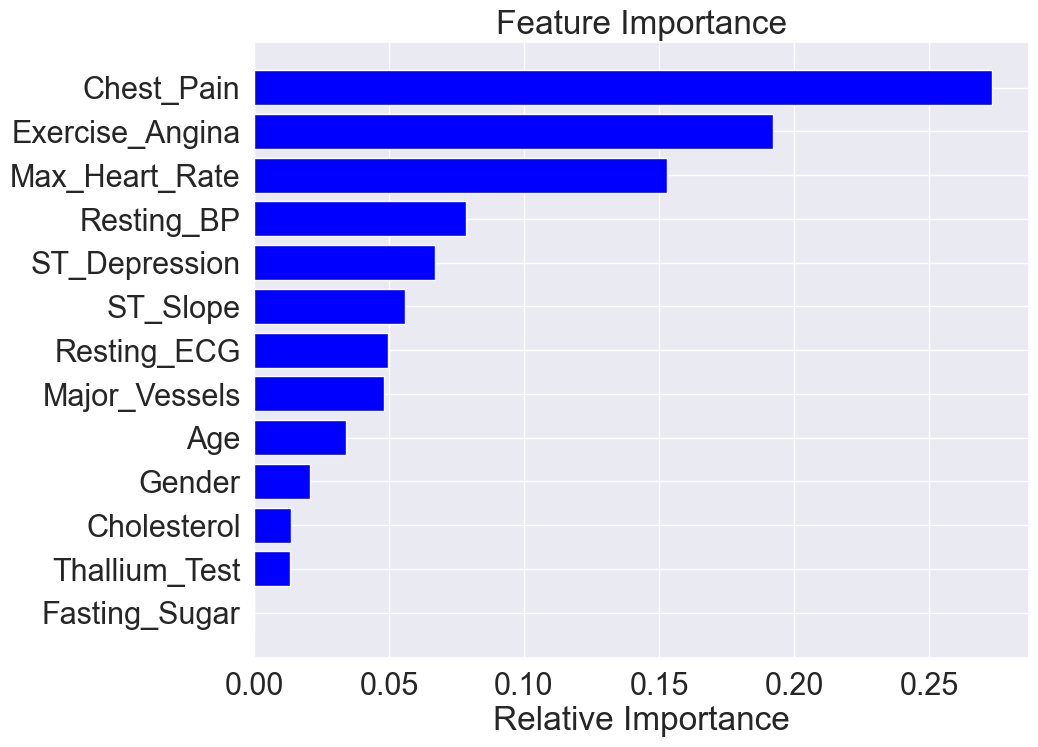

In [709]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Recall that overfitting was a problem. Let's reduce overfitting by using Grid Search technique for hyperparameter tuning of the tree model.

In [710]:
from sklearn.model_selection import GridSearchCV

In [711]:
# Choose the type of classifier
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(15,27),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.0001,0.001,0.001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=15,
                       max_features='log2', min_impurity_decrease=0.001,
                       random_state=1, splitter='random')

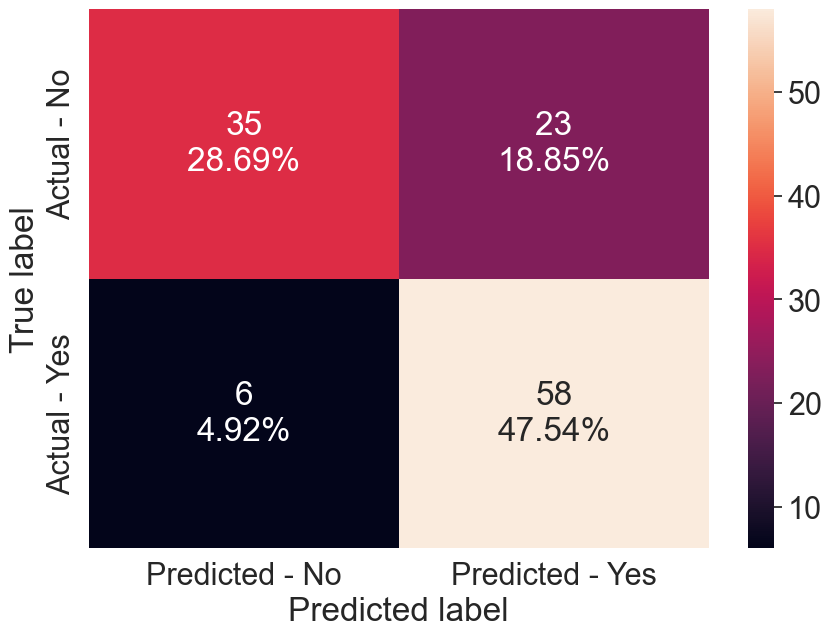

In [712]:
make_confusion_matrix(estimator,y_test)

In [713]:
get_recall_score(estimator)

Recall on training set :  1.0
Recall on test set :  0.90625


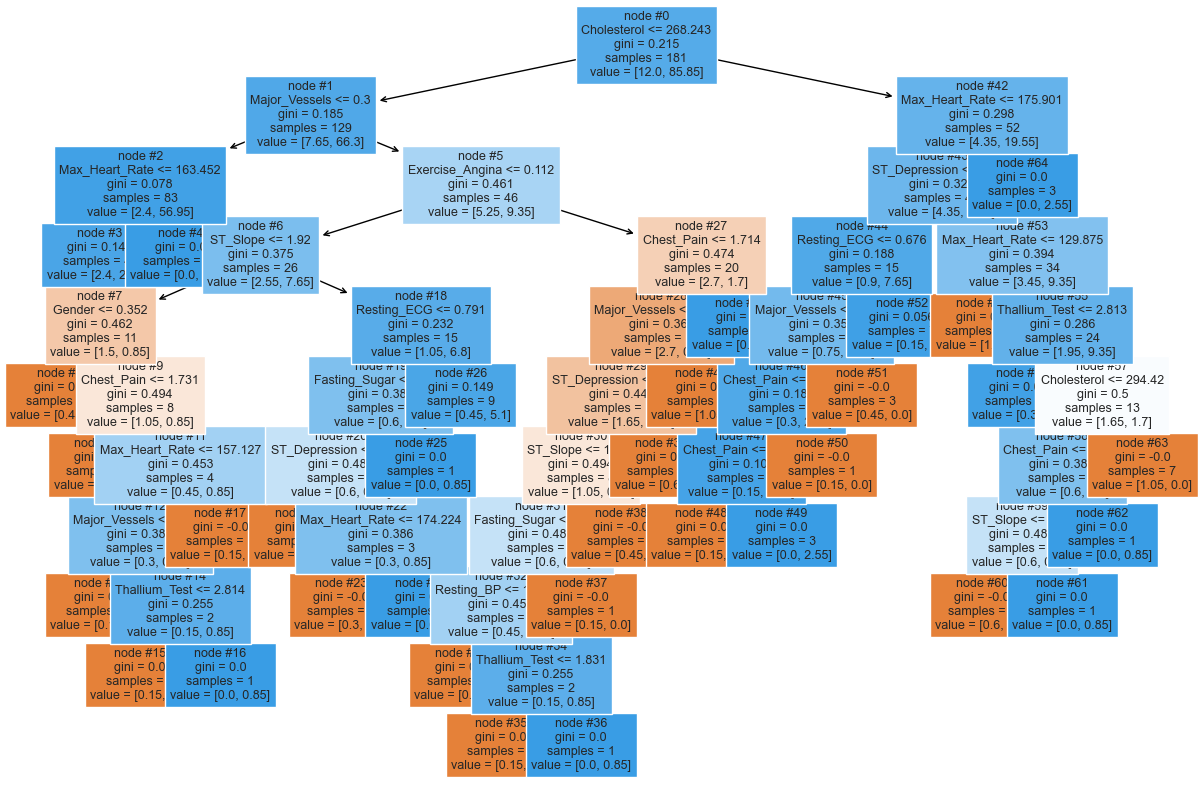

In [714]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [715]:
# Gini importance
print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                 Imp
Major_Vessels   0.23
Max_Heart_Rate  0.19
Chest_Pain      0.12
ST_Slope        0.12
Thallium_Test   0.10
Cholesterol     0.07
Exercise_Angina 0.05
ST_Depression   0.05
Resting_BP      0.02
Fasting_Sugar   0.02
Resting_ECG     0.02
Gender          0.01
Age             0.00


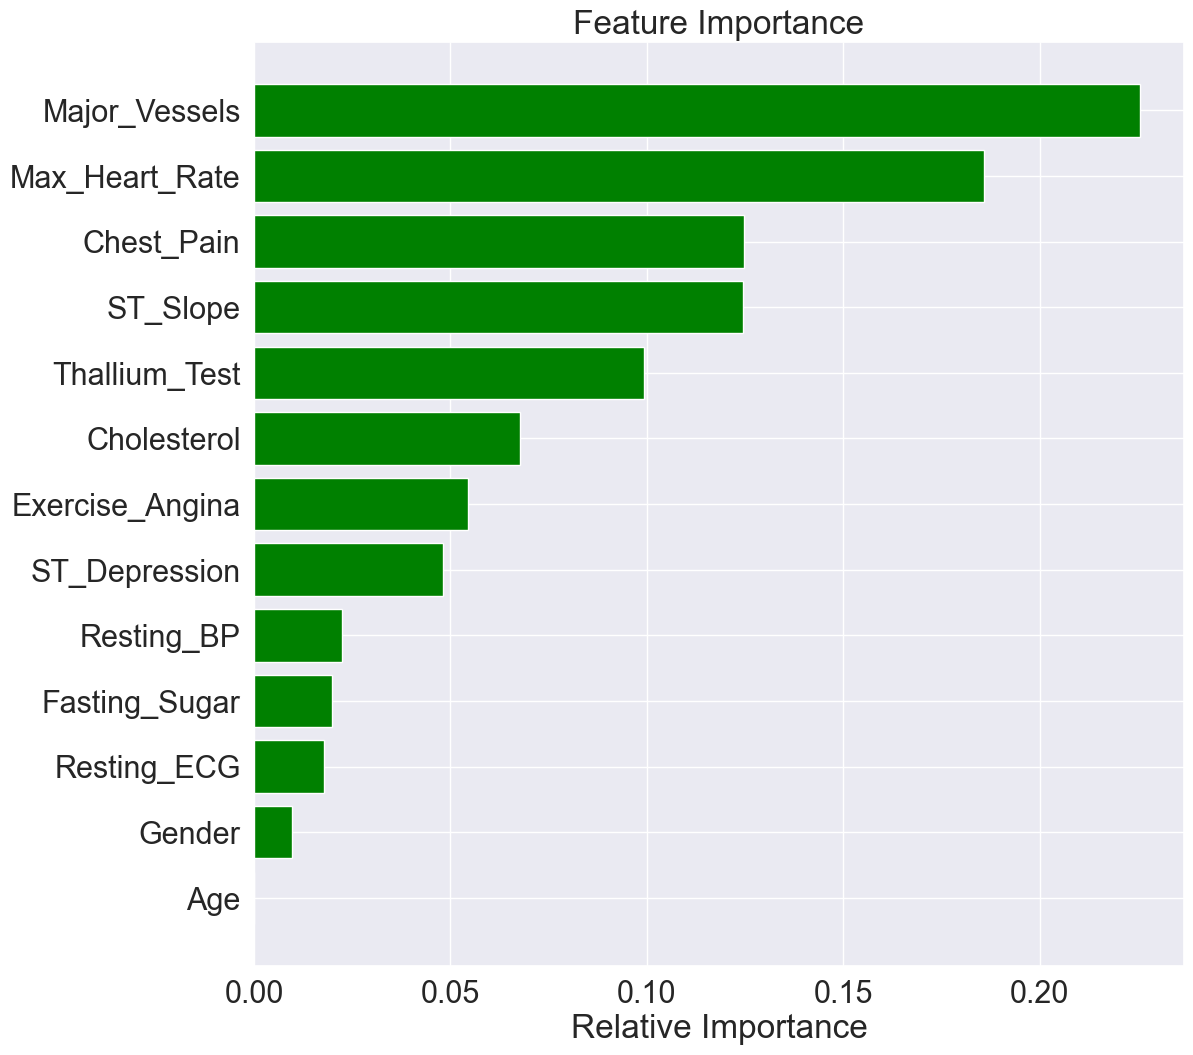

In [716]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Comparing Decision Trees

In [717]:
comparison_frame_dtree = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with Grid SearchCV'], 'Train_Recall':[1,0.97], 'Test_Recall':[0.43, 0.89]}) 
comparison_frame_dtree

Model  Train_Recall  Test_Recall
0       Initial decision tree model          1.00         0.43
1  Decision tree with Grid SearchCV          0.97         0.89

### Now let's build classification models using Decision Tree Classifier, Bagging Classifier, and Random Forest Classifier

In [718]:
# Libraries for different classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# Libraries for model tuning and evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [719]:
data_2=df

In [720]:
X = data_2.drop('Outcome',axis=1)
y = data_2['Outcome'] 

In [721]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
# random state controls shuffling before applying split; shuffling is default; stratify allows shuffle by class
print(X_train.shape, X_test.shape)

(212, 13) (91, 13)


In [722]:
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

# Parameters:
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Scoring method used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=2,
                       max_leaf_nodes=3, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

In [723]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier designed to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    # Recall = minimizes false negatives
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    # Precision = minimizes false positives
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returns the list with train and test scores

In [724]:
##  Function to calculate different metric scores of the model - Accuracy, Recall, Precision AND F1
def get_metrics_score(model,flag=True):
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    # Recall = minimizes false negatives
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    # Precision = minimizes false positives
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1, test_f1))
        
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returns the list with train and test scores

In [725]:
# Function to make confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy on training set :  1.0
Accuracy on test set :  0.7362637362637363
Recall on training set :  1.0
Recall on test set :  0.72
Precision on training set :  1.0
Precision on test set :  0.782608695652174
F1-Score on training set :  1.0
F1-Score on test set :  0.7499999999999999


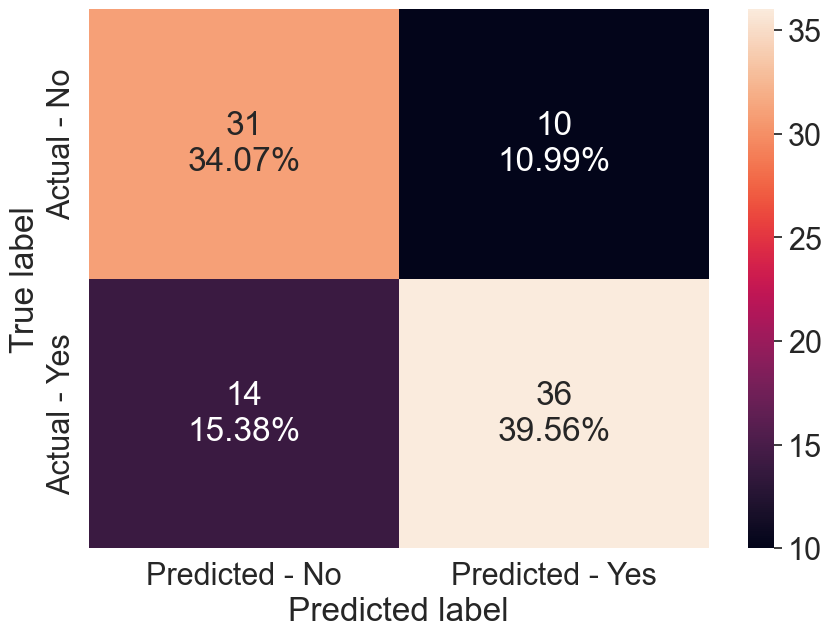

In [726]:
# Fit the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

# Calculate metrics
get_metrics_score(d_tree)

# Create the confusion matrix
make_confusion_matrix(d_tree,y_test)

### Random Forest

Accuracy on training set :  1.0
Accuracy on test set :  0.8021978021978022
Recall on training set :  1.0
Recall on test set :  0.8
Precision on training set :  1.0
Precision on test set :  0.8333333333333334
F1-Score on training set :  1.0
F1-Score on test set :  0.816326530612245


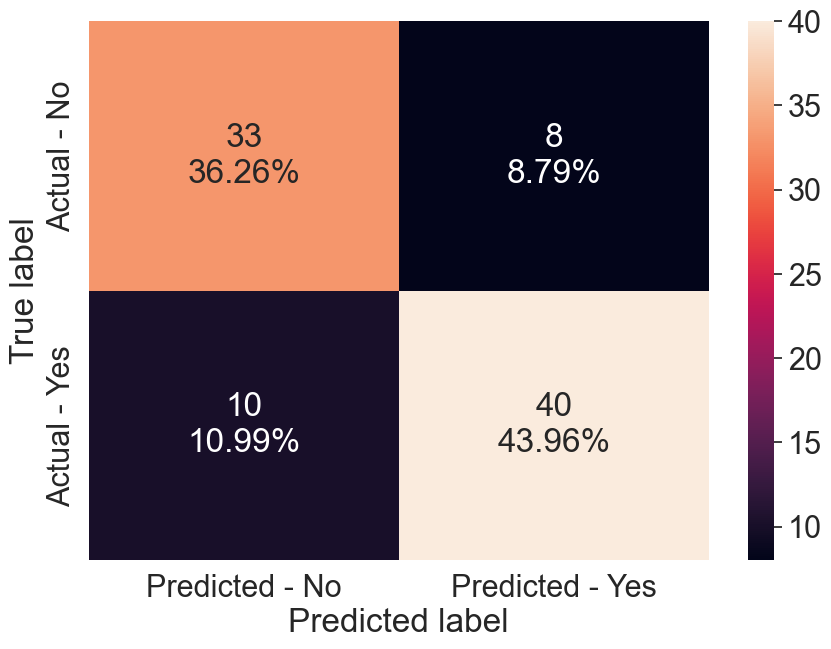

In [727]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

### Bagging Classifier

Accuracy on training set : 

 0.9952830188679245
Accuracy on test set :  0.7692307692307693
Recall on training set :  1.0
Recall on test set :  0.72
Precision on training set :  0.9913793103448276
Precision on test set :  0.8372093023255814
F1-Score on training set :  0.9956709956709957
F1-Score on test set :  0.7741935483870969


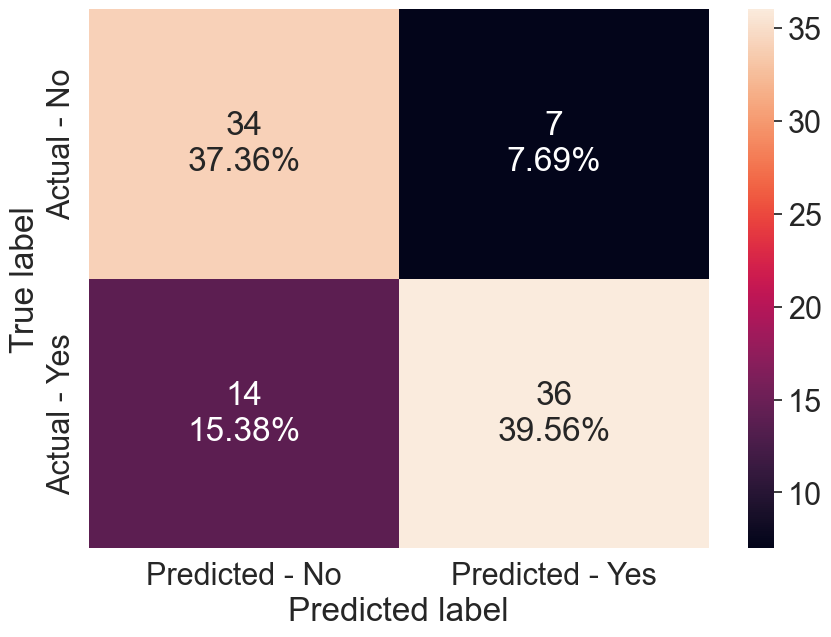

In [728]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

### Tuned Decision Tree

In [729]:
#Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=2,
                       max_leaf_nodes=3, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

Accuracy on training set :  0.7735849056603774
Accuracy on test set :  0.7582417582417582
Recall on training set :  0.9739130434782609
Recall on test set :  0.96
Precision on training set :  0.7133757961783439
Precision on test set :  0.7058823529411765
F1-Score on training set :  0.8235294117647058
F1-Score on test set :  0.8135593220338982


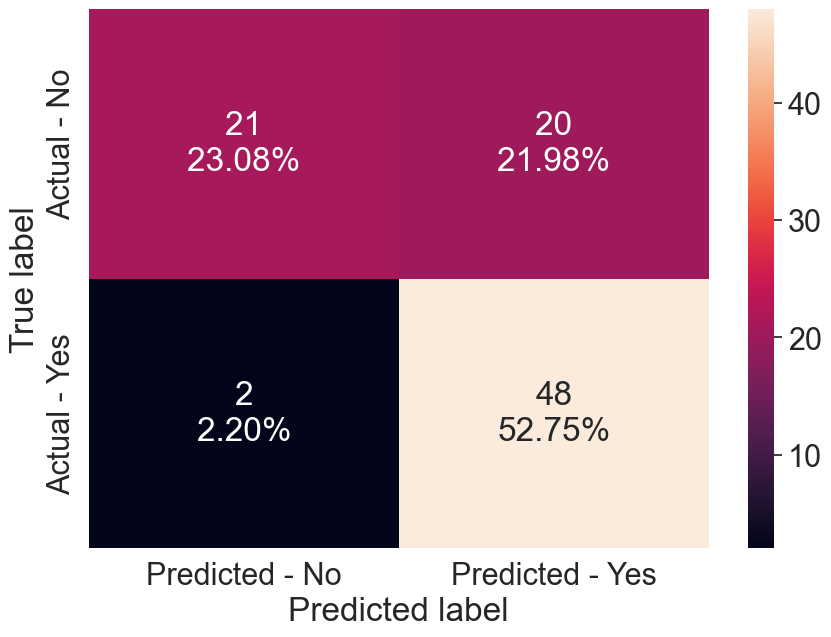

In [730]:
get_metrics_score(dtree_tuned)

make_confusion_matrix(dtree_tuned,y_test)

### Tuned Random Forest

* The test recall has increased significantly after hyperparameter tuning but the model is still overfitting the training data. 
* The confusion matrix shows that the model is able to identify majority of patients who are at risk of diabetes.

### Tuned Bagging Classifier

In [731]:
# Choose the type of classifier. 
bagging_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_samples': [0.5, 0.6, 0.7],
    'max_features': [0.5, 0.6, 0.7],
    'n_estimators': [50, 100, 150]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.5, max_samples=0.6, n_estimators=100,
                  random_state=1)

Accuracy on training set :  1.0
Accuracy on test set :  0.8461538461538461
Recall on training set :  1.0
Recall on test set :  0.86
Precision on training set :  1.0
Precision on test set :  0.86
F1-Score on training set :  1.0
F1-Score on test set :  0.8599999999999999


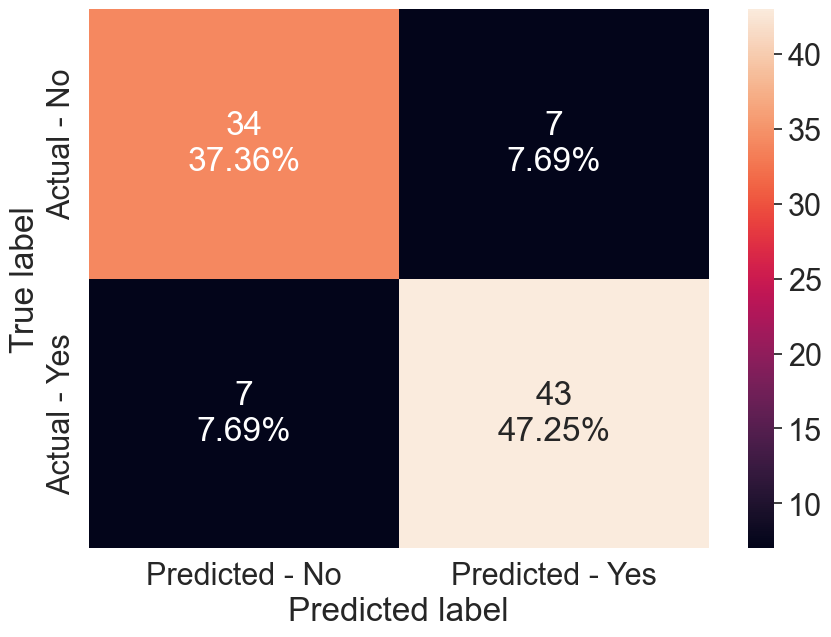

In [732]:
#Calculating different metrics
get_metrics_score(bagging_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_tuned,y_test)

### Comparing Supervised ML Classification Models

In [733]:
# Identify the models to compare
models = [d_tree, dtree_tuned, rf_estimator, bagging_classifier, bagging_tuned]

# Define empty lists to add results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# Loop through all identified models to get the metrics score (i.e., Accuracy, Recall, Precision, and F1)
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [734]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest',
                                          'Bagging Classifier','Tuned Bagging Classifier'], 'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test, 'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'F1_Train':f1_train, 'F1_Test':f1_test})

#Sort models in decreasing order of test recall
comparison_frame.sort_values(by='F1_Test',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
4  Tuned Bagging Classifier            1.00           0.85          1.00   
2             Random Forest            1.00           0.80          1.00   
1       Tuned Decision Tree            0.77           0.76          0.97   
3        Bagging Classifier            1.00           0.77          1.00   
0             Decision Tree            1.00           0.74          1.00   

   Test_Recall  Train_Precision  Test_Precision  F1_Train  F1_Test  
4         0.86             1.00            0.86      1.00     0.86  
2         0.80             1.00            0.83      1.00     0.82  
1         0.96             0.71            0.71      0.82     0.81  
3         0.72             0.99            0.84      1.00     0.77  
0         0.72             1.00            0.78      1.00     0.75

### Feature Importance for Selected Model

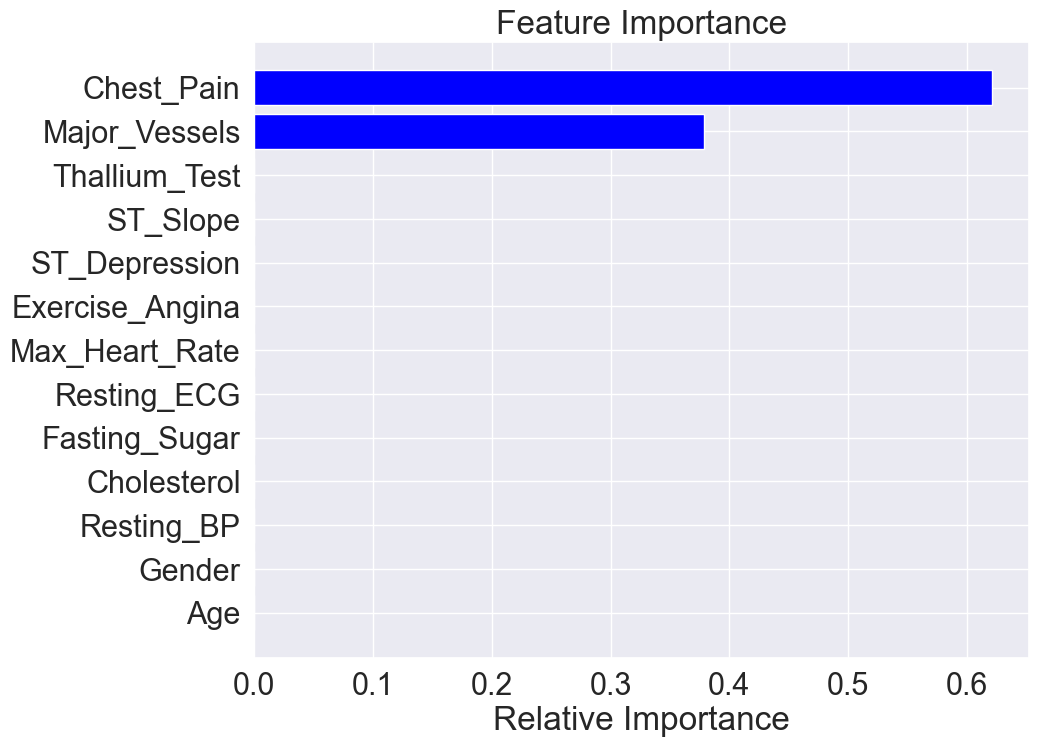

In [735]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [736]:
print (pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Relative Importance"], index = X_train.columns).sort_values(by = 'Relative Importance', ascending = False))

                 Relative Importance
Chest_Pain                      0.62
Major_Vessels                   0.38
Age                             0.00
Gender                          0.00
Resting_BP                      0.00
Cholesterol                     0.00
Fasting_Sugar                   0.00
Resting_ECG                     0.00
Max_Heart_Rate                  0.00
Exercise_Angina                 0.00
ST_Depression                   0.00
ST_Slope                        0.00
Thallium_Test                   0.00


### Boosting Models

### AdaBoost

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier

In [737]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [738]:
adaboost=AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

Accuracy on training set :  0.9433962264150944
Accuracy on test set :  0.8461538461538461
Recall on training set :  0.9391304347826087
Recall on test set :  0.86
Precision on training set :  0.9557522123893806
Precision on test set :  0.86
F1-Score on training set :  0.9473684210526316
F1-Score on test set :  0.8599999999999999


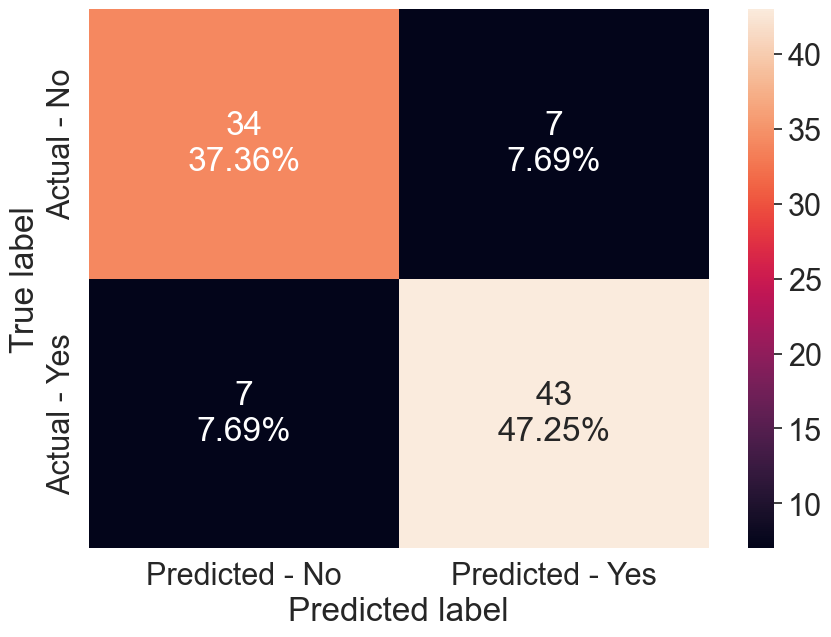

In [739]:
get_metrics_score(adaboost)

make_confusion_matrix(adaboost,y_test)

### Tuned Adaboost

In [740]:
%%time
adaboost_tuned = AdaBoostClassifier(random_state=1)

parameters = {'n_estimators': np.arange(10,100,10),                
              'learning_rate': [1, 0.1, 0.5, 0.01],                
              }

scorer = metrics.make_scorer(metrics.r2_score)

grid_obj = GridSearchCV(adaboost_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

adaboost_tuned = grid_obj.best_estimator_
 
adaboost_tuned.fit(X_train, y_train)

CPU times: total: 9.64 s
Wall time: 9.64 s


AdaBoostClassifier(learning_rate=0.1, n_estimators=30, random_state=1)

Accuracy on training set :  0.8490566037735849
Accuracy on test set :  0.8241758241758241
Recall on training set :  0.9130434782608695
Recall on test set :  0.84
Precision on training set :  0.8267716535433071
Precision on test set :  0.84
F1-Score on training set :  0.8677685950413223
F1-Score on test set :  0.8399999999999999


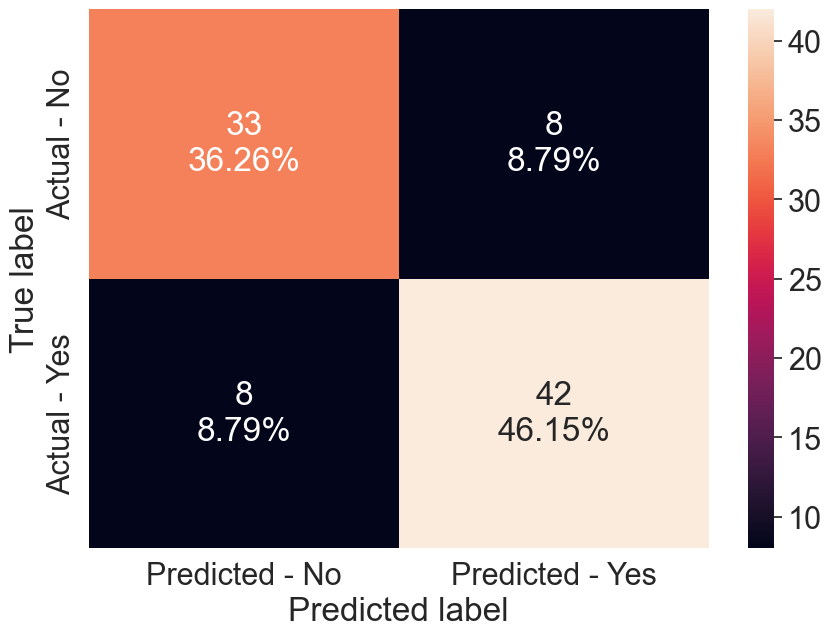

In [741]:
get_metrics_score(adaboost_tuned)

make_confusion_matrix(adaboost_tuned,y_test)

### Gradient Boosting

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

In [742]:
gradient_boost=GradientBoostingClassifier(random_state=1)
gradient_boost.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

Accuracy on training set :  1.0
Accuracy on test set :  0.7912087912087912
Recall on training set :  1.0
Recall on test set :  0.78
Precision on training set :  1.0
Precision on test set :  0.8297872340425532
F1-Score on training set :  1.0
F1-Score on test set :  0.8041237113402062
CPU times: total: 78.1 ms
Wall time: 68.8 ms


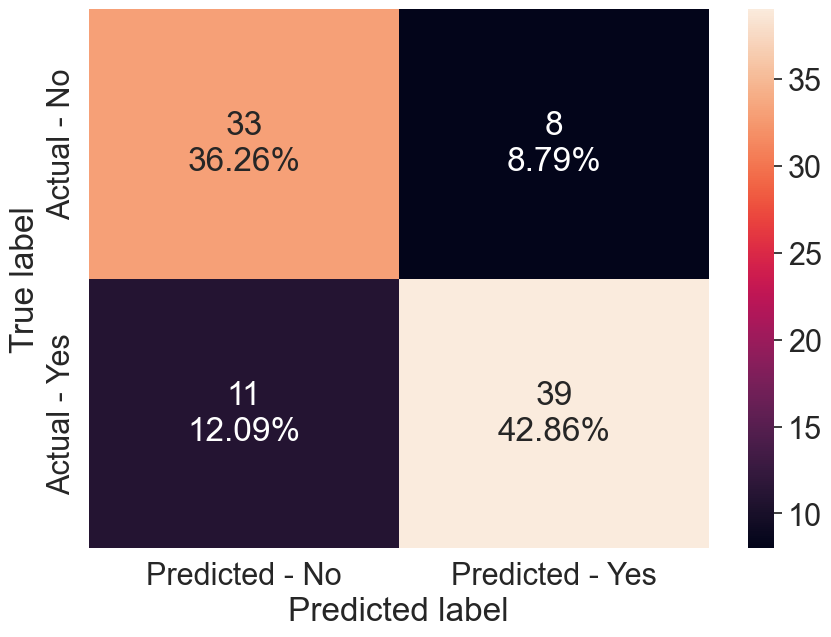

In [743]:
%%time
get_metrics_score(gradient_boost)

make_confusion_matrix(gradient_boost,y_test)

### Tuned Gradient Boosting

In [744]:
%%time

# Create the initial model
base_estimator = DecisionTreeClassifier(max_depth=1)

gb_tuned = GradientBoostingClassifier(init=base_estimator,random_state=1)

parameters = {
    "n_estimators": [20,50,100,150],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(gb_tuned, parameters, scoring=acc_scorer,cv=5)

grid_obj = grid_obj.fit(X_train, y_train)

gb_tuned = grid_obj.best_estimator_

gb_tuned.fit(X_train, y_train)

CPU times: total: 11.7 s
Wall time: 11.7 s


GradientBoostingClassifier(init=DecisionTreeClassifier(max_depth=1),
                           max_features=1, random_state=1, subsample=0.8)

Accuracy on training set :  0.9669811320754716
Accuracy on test set :  0.8571428571428571
Recall on training set :  0.9739130434782609
Recall on test set :  0.86
Precision on training set :  0.9655172413793104
Precision on test set :  0.8775510204081632
F1-Score on training set :  0.9696969696969697
F1-Score on test set :  0.8686868686868686


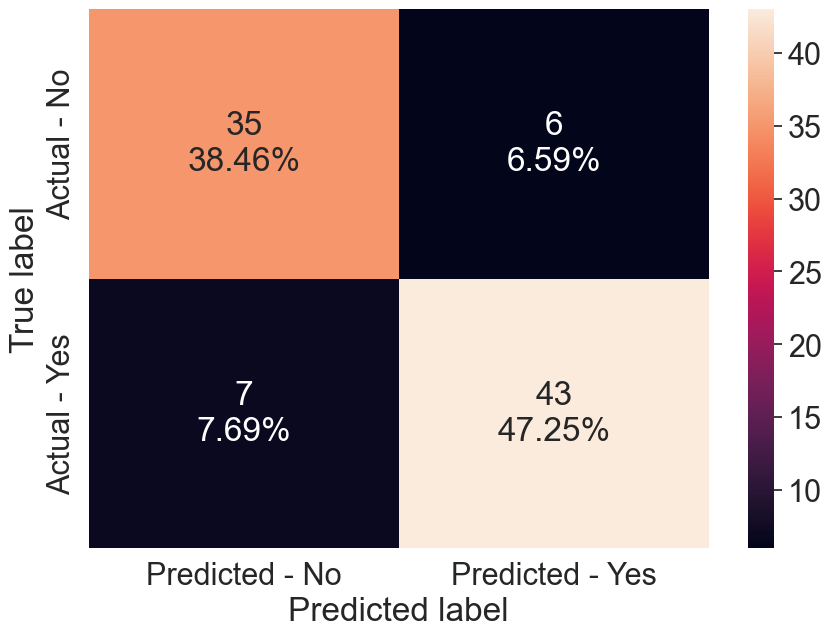

In [745]:
get_metrics_score(gb_tuned)

make_confusion_matrix(gb_tuned,y_test)

### XGBoost

In [746]:
!pip install xgboost
from xgboost import XGBClassifier

Defaulting to user installation because normal site-packages is not writeable


In [747]:
xgb = XGBClassifier(random_state=1, eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

In [748]:
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.7362637362637363
Recall on training set :  1.0
Recall on test set :  0.72
Precision on training set :  1.0
Precision on test set :  0.782608695652174
F1-Score on training set :  1.0
F1-Score on test set :  0.7499999999999999


Accuracy on training set :  1.0
Accuracy on test set :  0.7362637362637363
Recall on training set :  1.0
Recall on test set :  0.72
Precision on training set :  1.0
Precision on test set :  0.782608695652174
F1-Score on training set :  1.0
F1-Score on test set :  0.7499999999999999


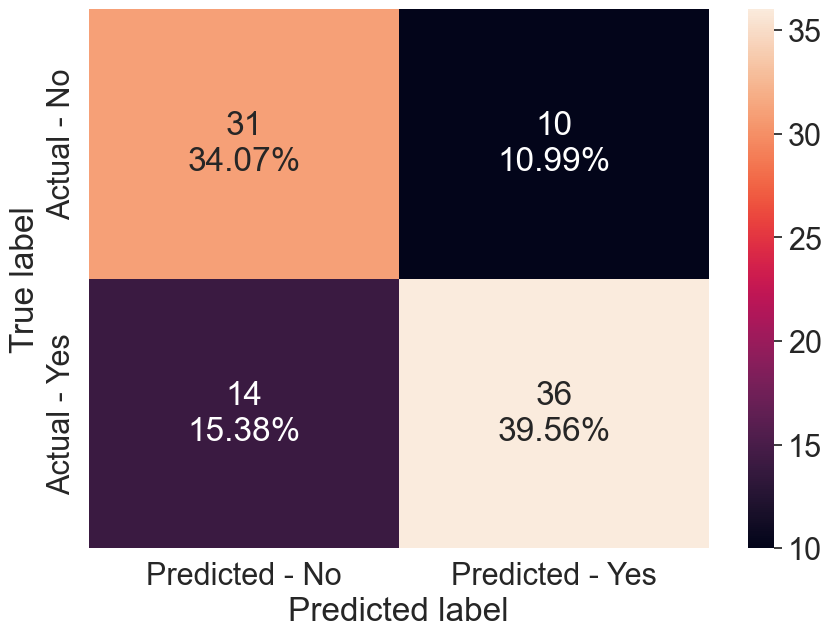

In [749]:
#Calculating different metrics
get_metrics_score(xgb)

#Creating confusion matrix
make_confusion_matrix(xgb,y_test)

In [750]:
%%time
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05,0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

xgb_tuned = grid_obj.best_estimator_

xgb_tuned.fit(X_train, y_train)

CPU times: total: 13min 9s
Wall time: 56.2 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

Accuracy on training set :  0.8867924528301887
Accuracy on test set :  0.8131868131868132
Recall on training set :  0.991304347826087
Recall on test set :  0.92
Precision on training set :  0.8321167883211679
Precision on test set :  0.7796610169491526
F1-Score on training set :  0.9047619047619048
F1-Score on test set :  0.8440366972477064


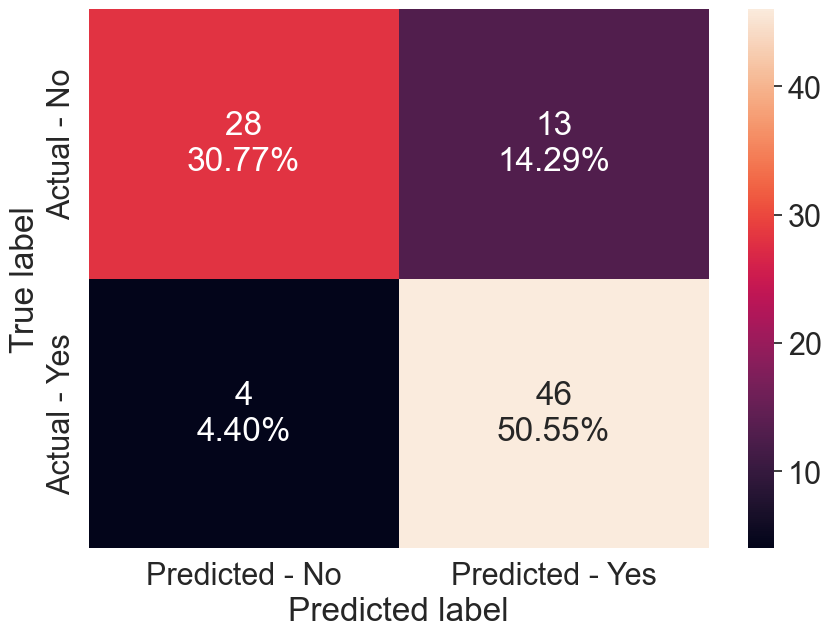

In [751]:
get_metrics_score(xgb_tuned)

make_confusion_matrix(xgb_tuned,y_test)

### Boosting Model Comparisons

In [752]:
# defining list of models
models = [adaboost, adaboost_tuned, gradient_boost, gb_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(np.round(j[6],2))
    f1_test.append(np.round(j[7],2))

In [753]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost','AdaBoost Tuned', 'Gradient Boost','Gradient Boost Tuned',
                                          'XGBoost','XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test,
                                          'Train_F1': f1_train,
                                          'Test_F1': f1_test}) 

comparison_frame.sort_values(by='Test_F1',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
3  Gradient Boost Tuned            0.97           0.86          0.97   
0              AdaBoost            0.94           0.85          0.94   
1        AdaBoost Tuned            0.85           0.82          0.91   
5         XGBoost Tuned            0.89           0.81          0.99   
2        Gradient Boost            1.00           0.79          1.00   
4               XGBoost            1.00           0.74          1.00   

   Test_Recall  Train_Precision  Test_Precision  Train_F1  Test_F1  
3         0.86             0.97            0.88      0.97     0.87  
0         0.86             0.96            0.86      0.95     0.86  
1         0.84             0.83            0.84      0.87     0.84  
5         0.92             0.83            0.78      0.90     0.84  
2         0.78             1.00            0.83      1.00     0.80  
4         0.72             1.00            0.78      1.00     0.75

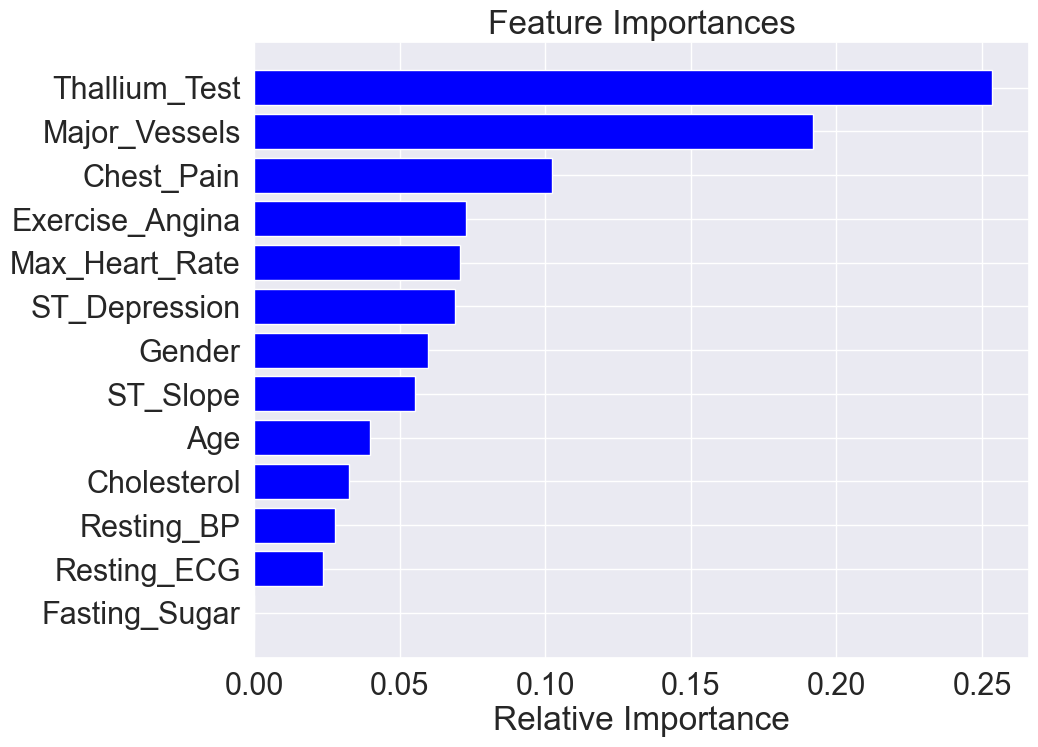

In [754]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [755]:
print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Relative Importance"], index = X_train.columns).sort_values(by = 'Relative Importance', ascending = False))

                 Relative Importance
Thallium_Test                   0.25
Major_Vessels                   0.19
Chest_Pain                      0.10
Exercise_Angina                 0.07
Max_Heart_Rate                  0.07
ST_Depression                   0.07
Gender                          0.06
ST_Slope                        0.06
Age                             0.04
Cholesterol                     0.03
Resting_BP                      0.03
Resting_ECG                     0.02
Fasting_Sugar                   0.00
